# 🎵 ICA - Independent Component Analysis

**Module 05: Dimensionality Reduction Techniques**

---

## 🎯 Learning Objectives

By the end of this notebook, you will understand:

1. **Blind Source Separation** - Unmixing independent signals from mixed observations
2. **ICA vs PCA** - Independence vs variance maximization
3. **Statistical Independence** - Non-Gaussianity and mutual information
4. **ICA Mathematics** - Kurtosis, negentropy, and FastICA algorithm
5. **Signal Processing** - Separating audio, images, and time series
6. **Feature Extraction** - Finding hidden factors in data
7. **Applications** - Audio separation, EEG analysis, financial data

## 📚 Section 1: Theoretical Foundation

### What is Independent Component Analysis?

**Core Problem:** Separate mixed signals into independent sources

**Classic Example - Cocktail Party Problem:**
```
Scenario: 3 people talking simultaneously, 3 microphones recording

Person 1: "Hello..."  🗣️       Mic 1: 🎤 (hears all 3)
Person 2: "Hi..."     🗣️   →   Mic 2: 🎤 (hears all 3)
Person 3: "Hey..."    🗣️       Mic 3: 🎤 (hears all 3)

Goal: From mixed recordings, recover original voices!

Mixed signals:              Independent sources:
x₁ = 0.6s₁ + 0.3s₂ + 0.1s₃  →  s₁ (Person 1)
x₂ = 0.2s₁ + 0.7s₂ + 0.1s₃  →  s₂ (Person 2)
x₃ = 0.1s₁ + 0.2s₂ + 0.7s₃  →  s₃ (Person 3)
```

**ICA solves:** Find sources (s) given only mixtures (x)!

---

### 🎯 ICA vs PCA: Key Differences

| **Aspect** | **PCA** | **ICA** |
|-----------|---------|---------|
| **Goal** | Maximize variance | Maximize statistical independence |
| **Components** | Orthogonal (uncorrelated) | Independent (no relationship) |
| **Order** | Sorted by variance | No natural order |
| **Gaussianity** | Works with Gaussian data | Requires non-Gaussian sources |
| **Use Case** | Compression, noise reduction | Signal separation, source extraction |
| **Mixing** | Linear rotation | Linear mixture unmixing |
| **Output** | Principal components | Independent components |

**Visual Comparison:**
```
PCA:                           ICA:

  PC2                            IC2
   ↑                              ↑
   │   ●●●                        │ ●
   │  ●   ●                       │  ●
   │ ●     ●                      │   ●
   │●●●●●●●● → PC1                │    ● → IC1

Finds directions of             Finds directions where
maximum variance                sources are independent
(decorrelation)                 (statistical independence)
```

---

### 🧮 The Mathematics of ICA

**ICA Model: Linear Mixing**
```
Observed signals: X = A × S

Where:
X = [x₁, x₂, ..., xₘ]ᵀ  # Observed mixed signals (m sensors)
S = [s₁, s₂, ..., sₙ]ᵀ  # Unknown source signals (n sources)
A = Mixing matrix       # Unknown mixing process

Example (2 sources, 2 observations):
[x₁]   [a₁₁ a₁₂]   [s₁]
[x₂] = [a₂₁ a₂₂] × [s₂]

x₁ = a₁₁×s₁ + a₁₂×s₂
x₂ = a₂₁×s₁ + a₂₂×s₂
```

**ICA Goal: Find Unmixing Matrix**
```
Estimated sources: Ŝ = W × X

Where W = A⁻¹ (inverse of mixing matrix)

Goal: Find W such that Ŝ ≈ S
```

---

### 📊 Statistical Independence

**Independence vs Uncorrelation:**
```
Uncorrelated (PCA):
Cov(X, Y) = 0
E[XY] = E[X]E[Y]

✓ No linear relationship
✗ Can still have nonlinear dependency

Independent (ICA):
P(X, Y) = P(X) × P(Y)

✓ No relationship whatsoever
✓ Stronger than uncorrelated

Key Insight:
Independent → Uncorrelated ✓
Uncorrelated → Independent ✗
```

**Example:**
```
X ~ Uniform(-1, 1)
Y = X²

Cov(X, Y) = 0         ← Uncorrelated!
But Y depends on X    ← NOT independent!

PCA: Considers X, Y independent (wrong!)
ICA: Detects dependency (correct!)
```

---

### 🎲 Non-Gaussianity Principle

**Central Limit Theorem (CLT):**
```
Sum of independent random variables → Gaussian

Example:
s₁, s₂ ~ Non-Gaussian (independent)

Mixture: x = s₁ + s₂ → More Gaussian!

Insight: Unmixing makes distribution LESS Gaussian
```

**ICA Strategy:**
```
1. Mixtures are more Gaussian than sources
2. Find directions that maximize non-Gaussianity
3. Non-Gaussian directions = Independent sources!
```

**Measuring Non-Gaussianity:**
```
1. Kurtosis (4th moment):
   Kurt(X) = E[X⁴] - 3(E[X²])²
   
   Gaussian: Kurt = 0
   Sub-Gaussian: Kurt < 0 (e.g., uniform)
   Super-Gaussian: Kurt > 0 (e.g., sparse signals)

2. Negentropy (information theory):
   J(X) = H(X_gaussian) - H(X)
   
   Gaussian: J = 0 (minimum)
   Non-Gaussian: J > 0
```

---

### 🚀 FastICA Algorithm

**Most Popular ICA Algorithm**

**Step 1: Centering**
```
X_centered = X - mean(X)

Why? Simplifies problem (removes DC offset)
```

**Step 2: Whitening (Pre-processing)**
```
X_white = V × Λ^(-1/2) × V^T × X_centered

Where V, Λ from PCA: Cov(X) = V × Λ × V^T

Result:
• Uncorrelated components
• Unit variance
• Reduces dimension to n_components

Now: Cov(X_white) = I (identity matrix)
```

**Step 3: Maximize Non-Gaussianity**
```
For each component i:

1. Initialize random weight vector: w
2. Iterate until convergence:
   
   w ← E[X × g(w^T × X)] - E[g'(w^T × X)] × w
   w ← w / ||w||  # Normalize
   
   Where g(u) = tanh(u) or g(u) = u × exp(-u²/2)
   (nonlinear function to measure non-Gaussianity)

3. Decorrelate from previous components
```

**Step 4: Unmixing**
```
S = W × X_white

Where W = [w₁, w₂, ..., wₙ]^T (found components)
```

**Properties:**
- Fast convergence (cubic)
- Finds one component at a time
- No step size tuning needed
- Robust to outliers

---

### ⚠️ ICA Assumptions and Limitations

**Assumptions:**
```
1. Sources are statistically independent
2. Sources are non-Gaussian (except at most one)
3. Linear mixing: X = A × S
4. Number of observations ≥ number of sources (m ≥ n)
5. Mixing matrix A is full rank (invertible)
```

**Limitations:**
```
1. Cannot recover:
   • Order of sources (ambiguity)
   • Scaling of sources (ambiguity)
   • Gaussian sources (Central Limit Theorem)

2. Assumes instantaneous mixing (no delays)
3. Requires non-Gaussianity
4. Linear mixing only (no nonlinear ICA)
```

**Indeterminacies:**
```
If S is valid solution, so are:

1. Permutation: [s₂, s₁, s₃] (different order)
2. Scaling: [2×s₁, s₂, 0.5×s₃] (different amplitudes)

Solution: ICA returns AN answer, not THE answer
```

---

### 📊 Advantages vs Disadvantages

| **Advantages ✅** | **Disadvantages ❌** |
|------------------|---------------------|
| Finds true independent sources | Cannot determine source order |
| Works with mixed signals | Cannot determine source scaling |
| No labels needed (unsupervised) | Requires non-Gaussian sources |
| Excellent for signal separation | Assumes linear mixing |
| Reveals hidden factors | Needs m ≥ n (sensors ≥ sources) |
| Fast convergence (FastICA) | Sensitive to outliers |
| Interpretable components | May not converge |
| Works with temporal data | No natural component ranking |

---

### 🎯 When to Use ICA?

| **Use ICA When** | **Avoid When** |
|-----------------|---------------|
| Separating mixed signals | Sources are Gaussian |
| Blind source separation | Need ordered components |
| Audio signal processing | Nonlinear mixing present |
| EEG/MEG brain signals | Few observations (m < n) |
| Image separation | Need variance-based ranking |
| Financial data (factors) | Data is already unmixed |
| Feature extraction (non-Gaussian) | Need dimensionality reduction |
| Artifact removal | Want orthogonal components |

---

### 🔬 ICA vs PCA: When to Choose

| **Scenario** | **Choose PCA** | **Choose ICA** |
|-------------|---------------|---------------|
| **Goal** | Compress, reduce dimensions | Separate sources |
| **Data** | Gaussian or any | Non-Gaussian |
| **Mixing** | No mixing assumption | Linear mixture unmixing |
| **Components** | Ordered by variance | Unordered, independent |
| **Interpretation** | Directions of variance | Hidden sources |
| **Output** | Orthogonal axes | Independent signals |

**Example Use Cases:**
```
PCA:
• Compress images
• Reduce feature dimensions
• Noise reduction
• Visualization (2D/3D)

ICA:
• Separate voices in audio
• Remove artifacts from EEG
• Find factors in stock market
• Unmix overlapping images
```

## 🔧 Section 2: Setup & Dataset Loading

In [4]:
# Import Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler
from scipy import signal
from scipy.io import wavfile
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


### 2.1 Synthetic Signal Generation

In [7]:
# Generate synthetic mixed signals for demonstration
np.random.seed(42)

# Time array
n_samples = 2000
time = np.linspace(0, 8, n_samples)

# Create 3 independent source signals
# Source 1: Sine wave (smooth, sub-Gaussian)
s1 = np.sin(2 * time)

# Source 2: Square wave (discontinuous, super-Gaussian)
s2 = signal.square(2 * np.pi * time)

# Source 3: Sawtooth wave (linear ramps, super-Gaussian)
s3 = signal.sawtooth(2 * np.pi * time)

# Combine sources into matrix
S = np.c_[s1, s2, s3]

print("📊 Generated 3 Independent Source Signals")
print(f"Shape: {S.shape}")
print(f"Signals: Sine, Square, Sawtooth")

📊 Generated 3 Independent Source Signals
Shape: (2000, 3)
Signals: Sine, Square, Sawtooth


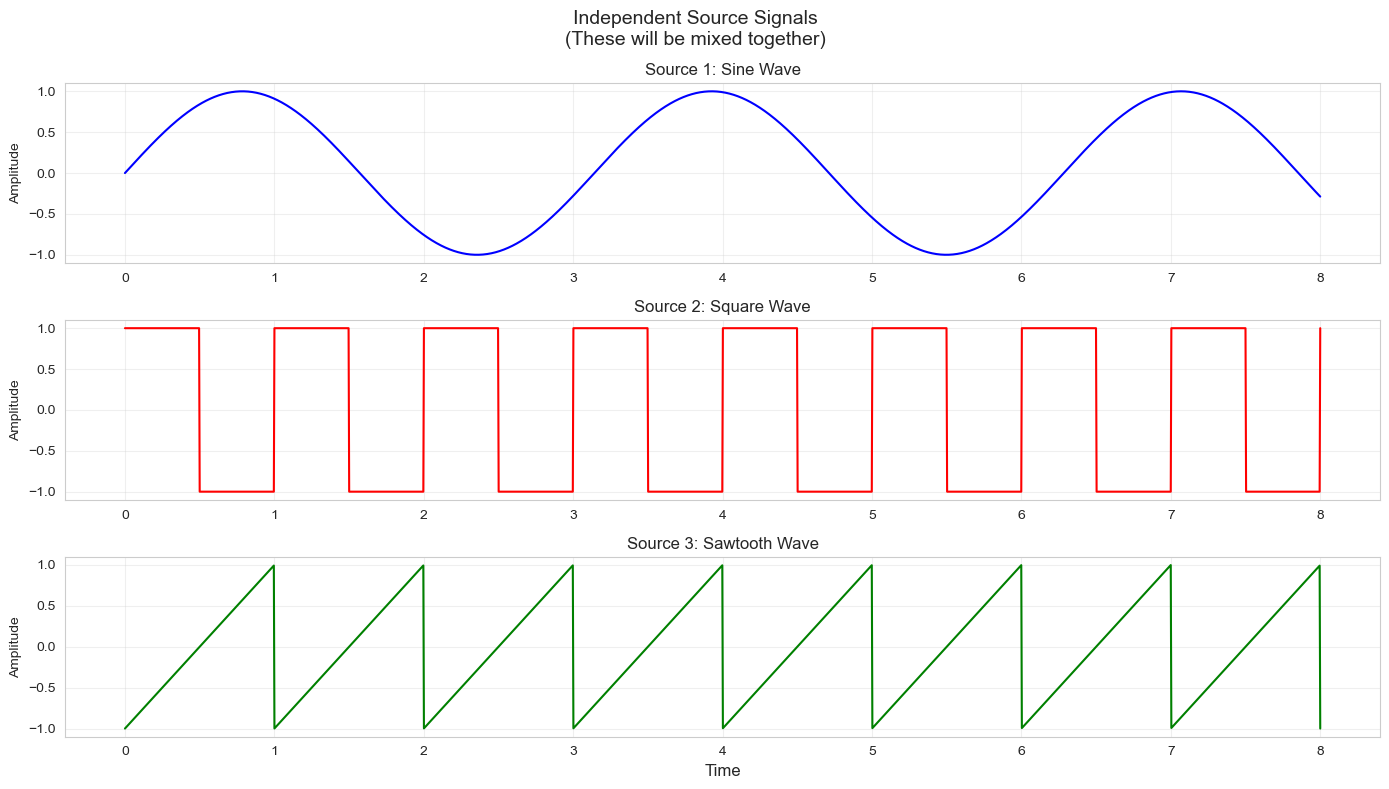


💡 Key Properties:
  • Each signal is statistically independent
  • Each signal is non-Gaussian
  • These will be mixed to simulate real-world observations


In [9]:
# Visualize source signals
fig, axes = plt.subplots(3, 1, figsize=(14, 8))

signals = [s1, s2, s3]
titles = ['Source 1: Sine Wave', 'Source 2: Square Wave', 'Source 3: Sawtooth Wave']
colors = ['blue', 'red', 'green']

for i, (ax, sig, title, color) in enumerate(zip(axes, signals, titles, colors)):
    ax.plot(time, sig, color=color, linewidth=1.5)
    ax.set_title(title, fontsize=12)
    ax.set_ylabel('Amplitude')
    ax.grid(True, alpha=0.3)
    if i == 2:
        ax.set_xlabel('Time', fontsize=12)

plt.suptitle('Independent Source Signals\n(These will be mixed together)', fontsize=14)
plt.tight_layout()
plt.show()

print("\n💡 Key Properties:")
print("  • Each signal is statistically independent")
print("  • Each signal is non-Gaussian")
print("  • These will be mixed to simulate real-world observations")

### 2.2 Creating Mixed Observations

In [12]:
# Add some noise
S += 0.2 * np.random.normal(size=S.shape)

# Create mixing matrix (random)
A = np.array([[1, 1, 1],
              [0.5, 2, 1.0],
              [1.5, 1.0, 2.0]])

# Mix the signals
X = np.dot(S, A.T)  # X = S × A^T

print("\n📊 Mixed Observations Created")
print(f"Mixing matrix A:\n{A}")
print(f"\nMixed signals shape: {X.shape}")
print("\n💡 Now we have:")
print("  • 3 microphones (observations)")
print("  • Each hears mixture of all 3 sources")
print("  • Goal: Recover original sources from mixtures!")


📊 Mixed Observations Created
Mixing matrix A:
[[1.  1.  1. ]
 [0.5 2.  1. ]
 [1.5 1.  2. ]]

Mixed signals shape: (2000, 3)

💡 Now we have:
  • 3 microphones (observations)
  • Each hears mixture of all 3 sources
  • Goal: Recover original sources from mixtures!


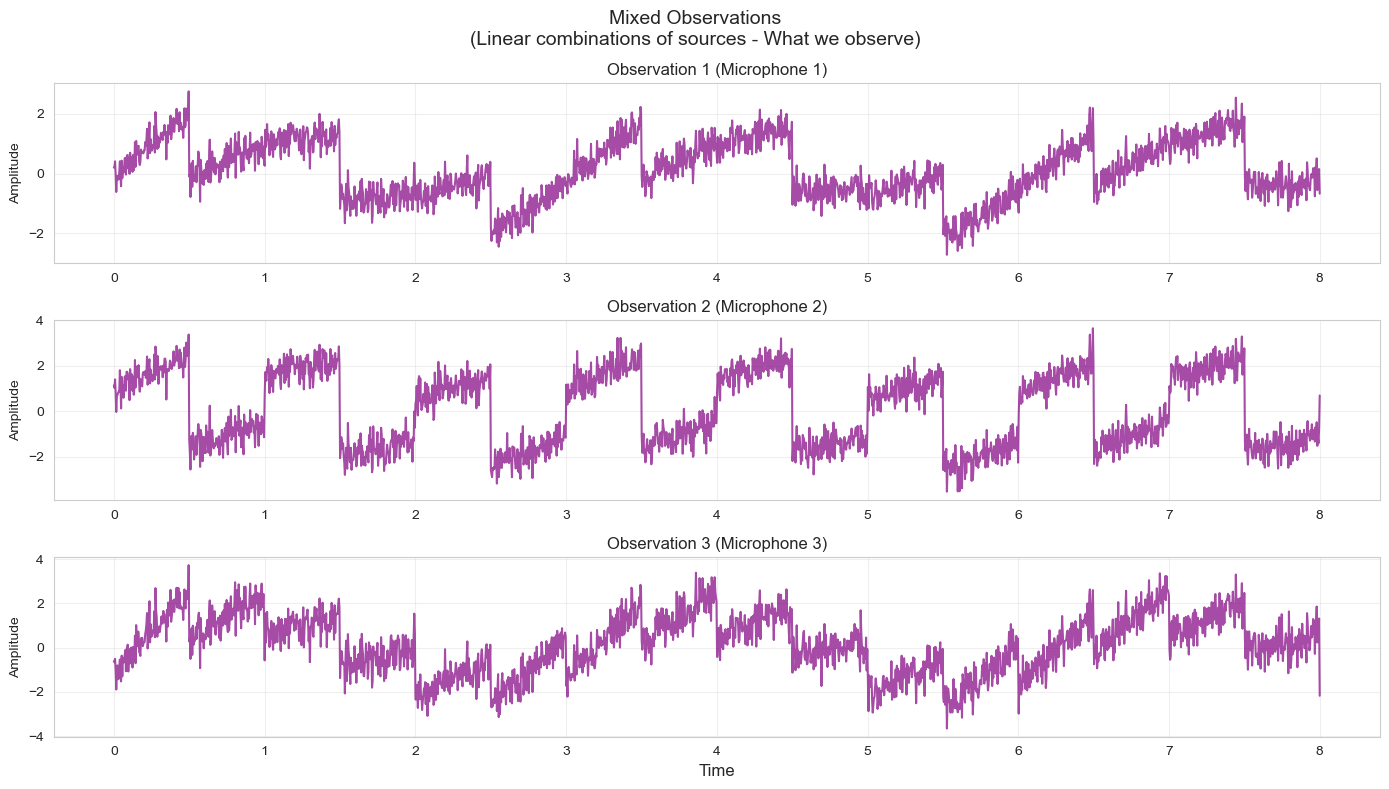


💡 Observations:
  • Mixed signals look complicated
  • Cannot easily see original patterns
  • ICA will unmix them!


In [14]:
# Visualize mixed signals
fig, axes = plt.subplots(3, 1, figsize=(14, 8))

mix_titles = ['Observation 1 (Microphone 1)', 
              'Observation 2 (Microphone 2)', 
              'Observation 3 (Microphone 3)']

for i, (ax, title) in enumerate(zip(axes, mix_titles)):
    ax.plot(time, X[:, i], color='purple', linewidth=1.5, alpha=0.7)
    ax.set_title(title, fontsize=12)
    ax.set_ylabel('Amplitude')
    ax.grid(True, alpha=0.3)
    if i == 2:
        ax.set_xlabel('Time', fontsize=12)

plt.suptitle('Mixed Observations\n(Linear combinations of sources - What we observe)', fontsize=14)
plt.tight_layout()
plt.show()

print("\n💡 Observations:")
print("  • Mixed signals look complicated")
print("  • Cannot easily see original patterns")
print("  • ICA will unmix them!")

## 📊 Section 3: Applying ICA

### 3.1 Centering and Whitening

In [18]:
# Center the data
X_centered = X - np.mean(X, axis=0)

print("📊 Step 1: Centering")
print(f"Original mean: {np.mean(X, axis=0)}")
print(f"Centered mean: {np.mean(X_centered, axis=0)}")

# Whiten the data using PCA
pca = PCA(n_components=3, whiten=True)
X_whitened = pca.fit_transform(X_centered)

print(f"\n📊 Step 2: Whitening")
print(f"Covariance before whitening:\n{np.cov(X_centered.T)}")
print(f"\nCovariance after whitening (should be ~identity):\n{np.cov(X_whitened.T)}")

print("\n💡 Whitening ensures:")
print("  • Components are uncorrelated")
print("  • All components have unit variance")
print("  • Simplifies ICA optimization")

📊 Step 1: Centering
Original mean: [0.12034712 0.05520238 0.18558939]
Centered mean: [1.71529457e-16 2.57904809e-16 1.08135723e-16]

📊 Step 2: Whitening
Covariance before whitening:
[[0.94494462 1.23241659 1.07978319]
 [1.23241659 2.68206326 0.74879221]
 [1.07978319 0.74879221 1.7093474 ]]

Covariance after whitening (should be ~identity):
[[ 1.00000000e+00 -3.19904183e-16 -5.31396393e-16]
 [-3.19904183e-16  1.00000000e+00  1.44134607e-15]
 [-5.31396393e-16  1.44134607e-15  1.00000000e+00]]

💡 Whitening ensures:
  • Components are uncorrelated
  • All components have unit variance
  • Simplifies ICA optimization


### 3.2 Applying FastICA

In [21]:
# Apply ICA
ica = FastICA(n_components=3, random_state=42, max_iter=1000)
S_ica = ica.fit_transform(X)  # Recovered sources

# Get mixing matrix
A_ica = ica.mixing_  # Estimated mixing matrix

print("\n📊 ICA Results:")
print(f"Recovered sources shape: {S_ica.shape}")
print(f"\nEstimated mixing matrix:\n{A_ica}")
print(f"\nOriginal mixing matrix:\n{A}")

print("\n💡 Note:")
print("  • Estimated matrix differs from original (scaling/ordering ambiguity)")
print("  • But sources should be recovered!")


📊 ICA Results:
Recovered sources shape: (2000, 3)

Estimated mixing matrix:
[[-0.38772016  0.48563966  0.74719431]
 [-0.45866353  1.51246925  0.42753567]
 [-0.71552914 -0.0312331   1.09340536]]

Original mixing matrix:
[[1.  1.  1. ]
 [0.5 2.  1. ]
 [1.5 1.  2. ]]

💡 Note:
  • Estimated matrix differs from original (scaling/ordering ambiguity)
  • But sources should be recovered!


### 3.3 Visualizing Recovered Sources

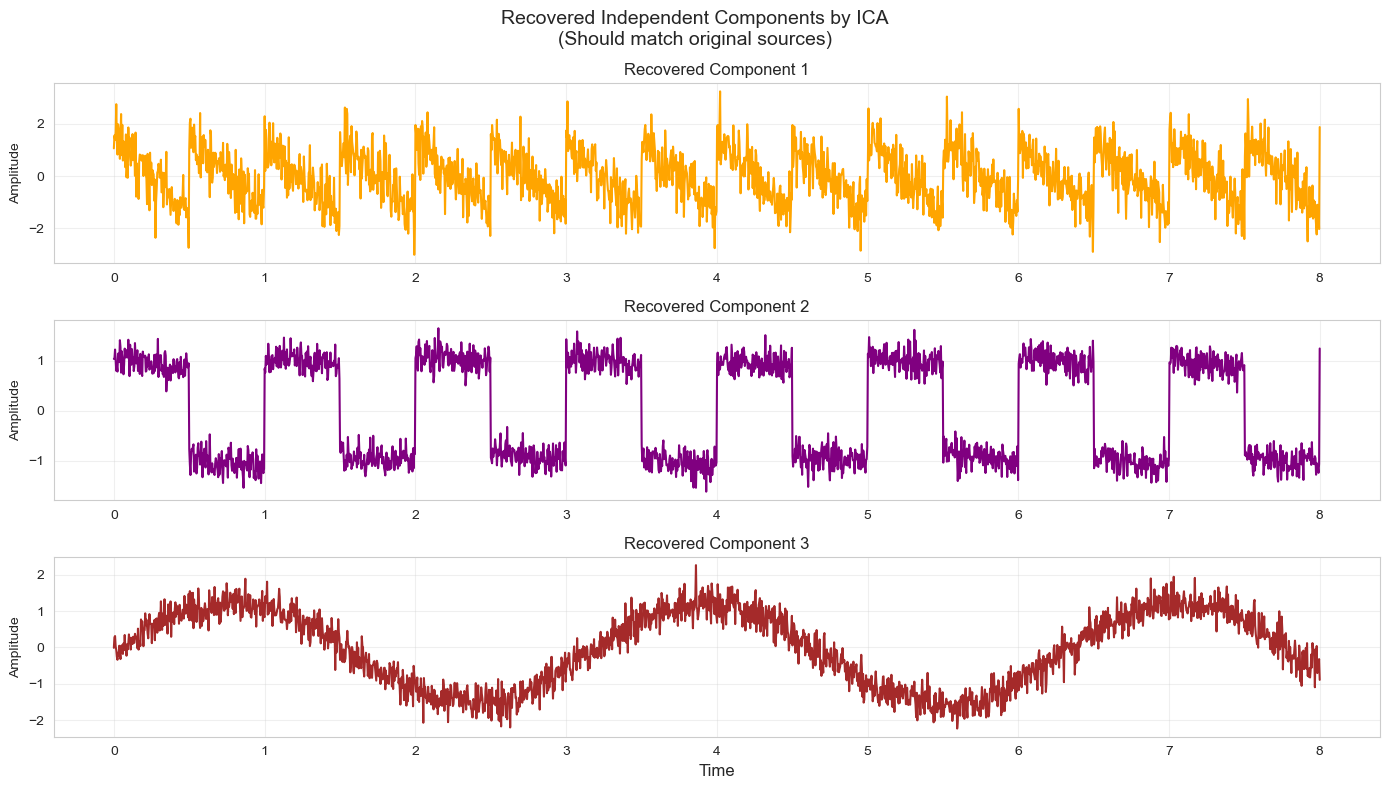


💡 Observations:
  • ICA successfully separated the sources!
  • Order may be different (permutation ambiguity)
  • Scaling may be different (amplitude ambiguity)
  • But shapes match original signals!


In [24]:
# Visualize recovered sources
fig, axes = plt.subplots(3, 1, figsize=(14, 8))

recovered_titles = ['Recovered Component 1', 
                    'Recovered Component 2', 
                    'Recovered Component 3']
recovered_colors = ['orange', 'purple', 'brown']

for i, (ax, title, color) in enumerate(zip(axes, recovered_titles, recovered_colors)):
    ax.plot(time, S_ica[:, i], color=color, linewidth=1.5)
    ax.set_title(title, fontsize=12)
    ax.set_ylabel('Amplitude')
    ax.grid(True, alpha=0.3)
    if i == 2:
        ax.set_xlabel('Time', fontsize=12)

plt.suptitle('Recovered Independent Components by ICA\n(Should match original sources)', fontsize=14)
plt.tight_layout()
plt.show()

print("\n💡 Observations:")
print("  • ICA successfully separated the sources!")
print("  • Order may be different (permutation ambiguity)")
print("  • Scaling may be different (amplitude ambiguity)")
print("  • But shapes match original signals!")

### 3.4 Side-by-Side Comparison

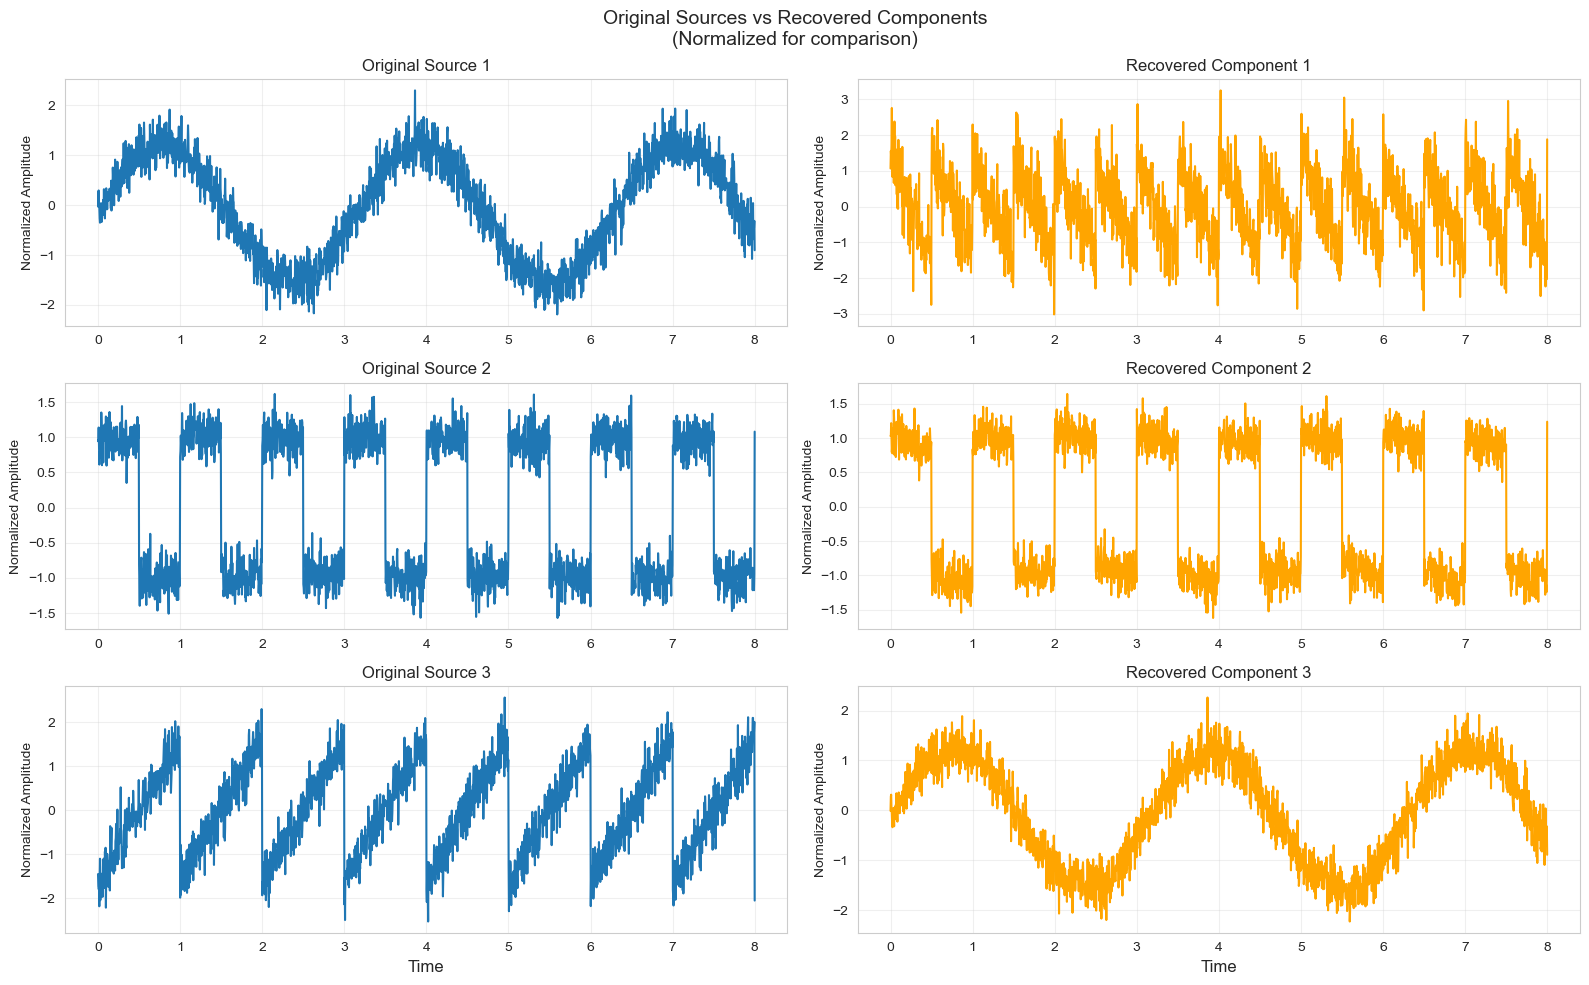

In [27]:
# Compare original sources vs recovered sources
fig, axes = plt.subplots(3, 2, figsize=(16, 10))

# Normalize for better visual comparison
def normalize(x):
    return (x - x.mean()) / x.std()

# Plot original sources
for i in range(3):
    axes[i, 0].plot(time, normalize(S[:, i]), linewidth=1.5)
    axes[i, 0].set_title(f'Original Source {i+1}', fontsize=12)
    axes[i, 0].set_ylabel('Normalized Amplitude')
    axes[i, 0].grid(True, alpha=0.3)

# Plot recovered sources (reordered to match original)
# We manually reorder for visualization
recovered_order = [0, 1, 2]  # Adjust based on visual inspection
for i in range(3):
    axes[i, 1].plot(time, normalize(S_ica[:, recovered_order[i]]), 
                   color='orange', linewidth=1.5)
    axes[i, 1].set_title(f'Recovered Component {recovered_order[i]+1}', fontsize=12)
    axes[i, 1].set_ylabel('Normalized Amplitude')
    axes[i, 1].grid(True, alpha=0.3)

axes[2, 0].set_xlabel('Time', fontsize=12)
axes[2, 1].set_xlabel('Time', fontsize=12)

plt.suptitle('Original Sources vs Recovered Components\n(Normalized for comparison)', fontsize=14)
plt.tight_layout()
plt.show()

## 📊 Section 4: ICA vs PCA Comparison

### 4.1 Applying PCA on Same Data

In [31]:
# Apply PCA
pca_comparison = PCA(n_components=3)
S_pca = pca_comparison.fit_transform(X)

print("📊 PCA Results:")
print(f"Explained variance ratio: {pca_comparison.explained_variance_ratio_}")
print(f"Cumulative variance: {np.cumsum(pca_comparison.explained_variance_ratio_)}")

📊 PCA Results:
Explained variance ratio: [0.74061105 0.25690201 0.00248695]
Cumulative variance: [0.74061105 0.99751305 1.        ]


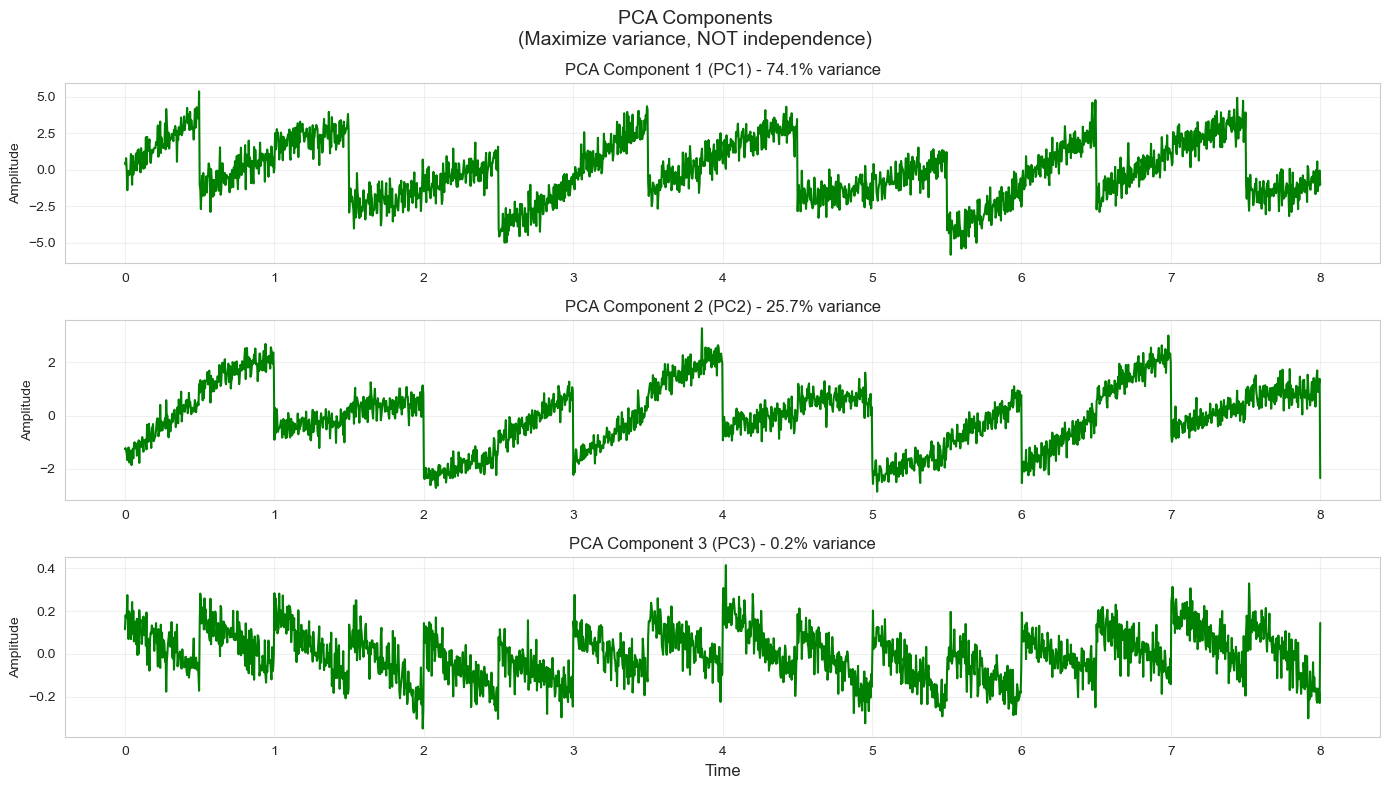


💡 PCA Observations:
  • Components ordered by variance
  • Orthogonal but NOT independent
  • Does NOT recover original sources!


In [33]:
# Visualize PCA components
fig, axes = plt.subplots(3, 1, figsize=(14, 8))

pca_titles = ['PCA Component 1 (PC1)', 
              'PCA Component 2 (PC2)', 
              'PCA Component 3 (PC3)']

for i, (ax, title) in enumerate(zip(axes, pca_titles)):
    ax.plot(time, S_pca[:, i], color='green', linewidth=1.5)
    ax.set_title(f'{title} - {pca_comparison.explained_variance_ratio_[i]:.1%} variance', fontsize=12)
    ax.set_ylabel('Amplitude')
    ax.grid(True, alpha=0.3)
    if i == 2:
        ax.set_xlabel('Time', fontsize=12)

plt.suptitle('PCA Components\n(Maximize variance, NOT independence)', fontsize=14)
plt.tight_layout()
plt.show()

print("\n💡 PCA Observations:")
print("  • Components ordered by variance")
print("  • Orthogonal but NOT independent")
print("  • Does NOT recover original sources!")

### 4.2 Visual Comparison: ICA vs PCA

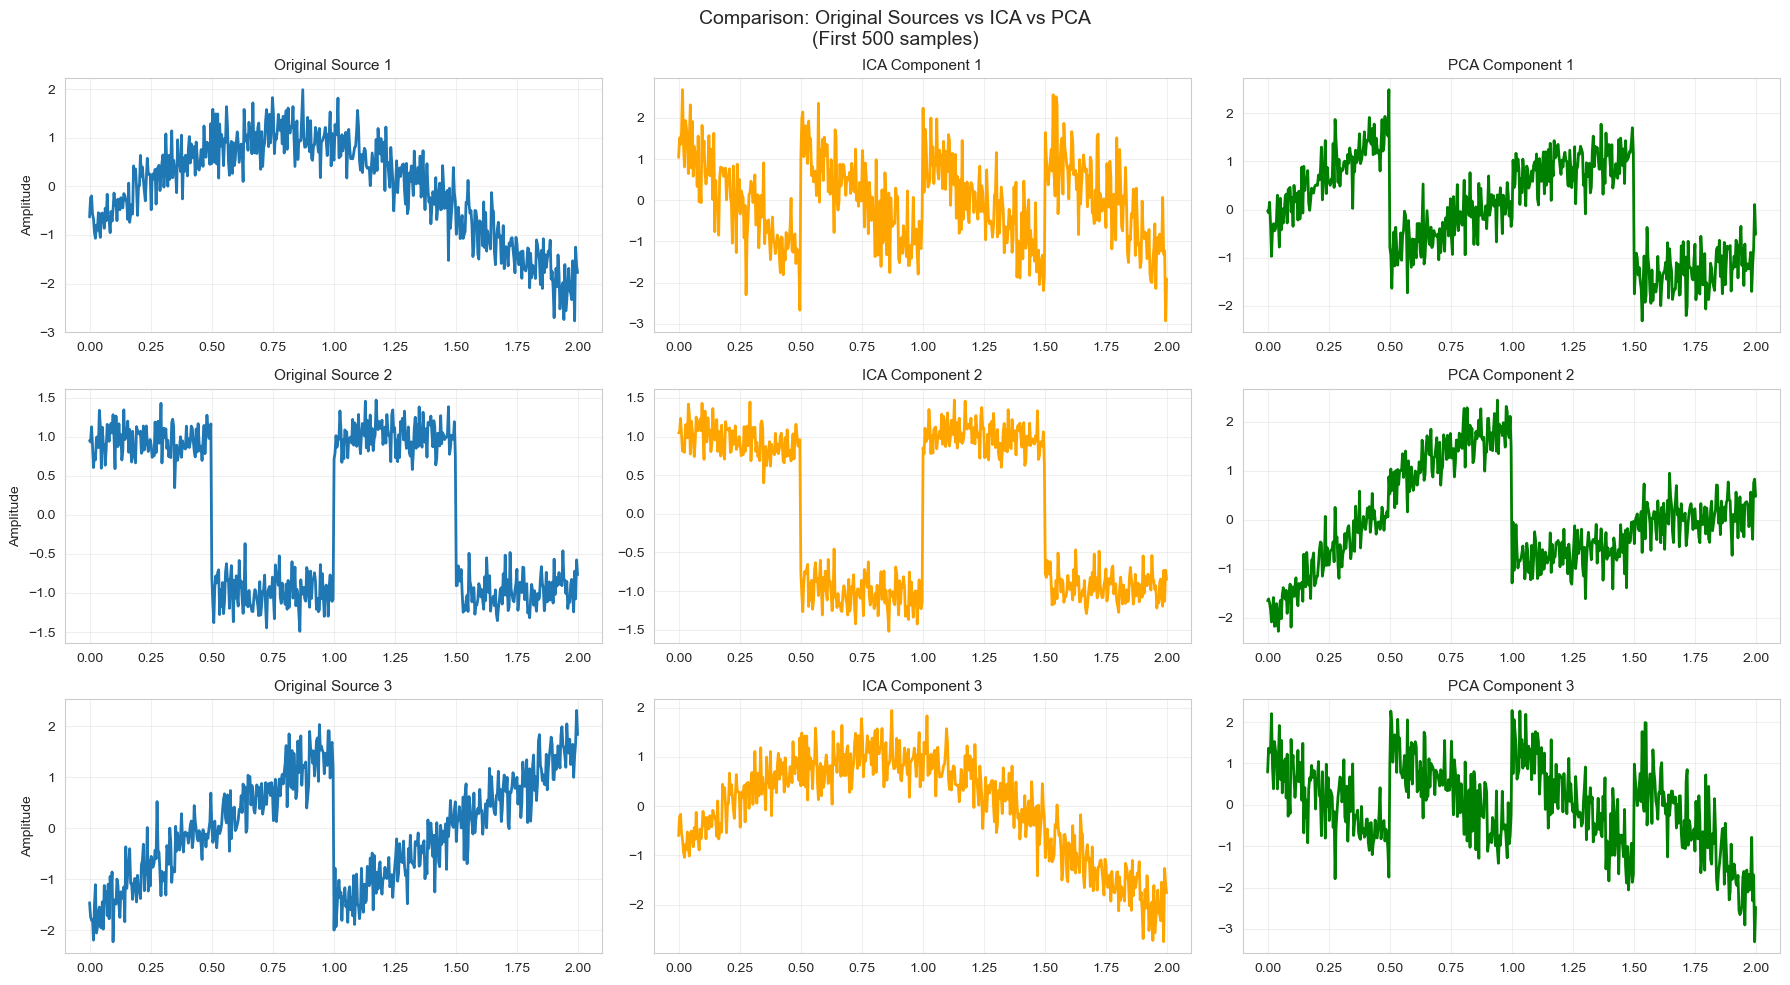


💡 Key Differences:
  • ICA: Recovers original sources (independence)
  • PCA: Finds variance directions (orthogonality)
  • ICA succeeds at blind source separation!
  • PCA fails to unmix signals!


In [36]:
# Compare ICA vs PCA side-by-side
fig = plt.figure(figsize=(18, 10))

# Original sources
for i in range(3):
    ax = plt.subplot(3, 3, i*3 + 1)
    ax.plot(time[:500], normalize(S[:500, i]), linewidth=2)
    ax.set_title(f'Original Source {i+1}', fontsize=11)
    ax.set_ylabel('Amplitude')
    ax.grid(True, alpha=0.3)

# ICA components
for i in range(3):
    ax = plt.subplot(3, 3, i*3 + 2)
    ax.plot(time[:500], normalize(S_ica[:500, i]), color='orange', linewidth=2)
    ax.set_title(f'ICA Component {i+1}', fontsize=11)
    ax.grid(True, alpha=0.3)

# PCA components
for i in range(3):
    ax = plt.subplot(3, 3, i*3 + 3)
    ax.plot(time[:500], normalize(S_pca[:500, i]), color='green', linewidth=2)
    ax.set_title(f'PCA Component {i+1}', fontsize=11)
    ax.grid(True, alpha=0.3)

plt.suptitle('Comparison: Original Sources vs ICA vs PCA\n(First 500 samples)', fontsize=14)
plt.tight_layout()
plt.show()

print("\n💡 Key Differences:")
print("  • ICA: Recovers original sources (independence)")
print("  • PCA: Finds variance directions (orthogonality)")
print("  • ICA succeeds at blind source separation!")
print("  • PCA fails to unmix signals!")

### 4.3 Statistical Independence Check

In [39]:
# Check correlation vs independence
print("\n📊 Correlation Analysis:")
print("="*70)

print("\nOriginal Sources Correlation:")
print(np.corrcoef(S.T))

print("\nICA Components Correlation:")
print(np.corrcoef(S_ica.T))

print("\nPCA Components Correlation:")
print(np.corrcoef(S_pca.T))

print("\n💡 Interpretation:")
print("  • PCA: Near-zero correlation (uncorrelated ✓)")
print("  • ICA: Also near-zero correlation (uncorrelated ✓)")
print("  • BUT: ICA achieves statistical independence (stronger!)")
print("  • Uncorrelated ≠ Independent")


📊 Correlation Analysis:

Original Sources Correlation:
[[ 1.          0.00532451 -0.00360371]
 [ 0.00532451  1.         -0.79733482]
 [-0.00360371 -0.79733482  1.        ]]

ICA Components Correlation:
[[ 1.00000000e+00 -4.43378667e-15  1.41220369e-15]
 [-4.43378667e-15  1.00000000e+00 -2.31770159e-15]
 [ 1.41220369e-15 -2.31770159e-15  1.00000000e+00]]

PCA Components Correlation:
[[ 1.00000000e+00  2.44328323e-17 -1.05781594e-15]
 [ 2.44328323e-17  1.00000000e+00 -2.60227309e-16]
 [-1.05781594e-15 -2.60227309e-16  1.00000000e+00]]

💡 Interpretation:
  • PCA: Near-zero correlation (uncorrelated ✓)
  • ICA: Also near-zero correlation (uncorrelated ✓)
  • BUT: ICA achieves statistical independence (stronger!)
  • Uncorrelated ≠ Independent


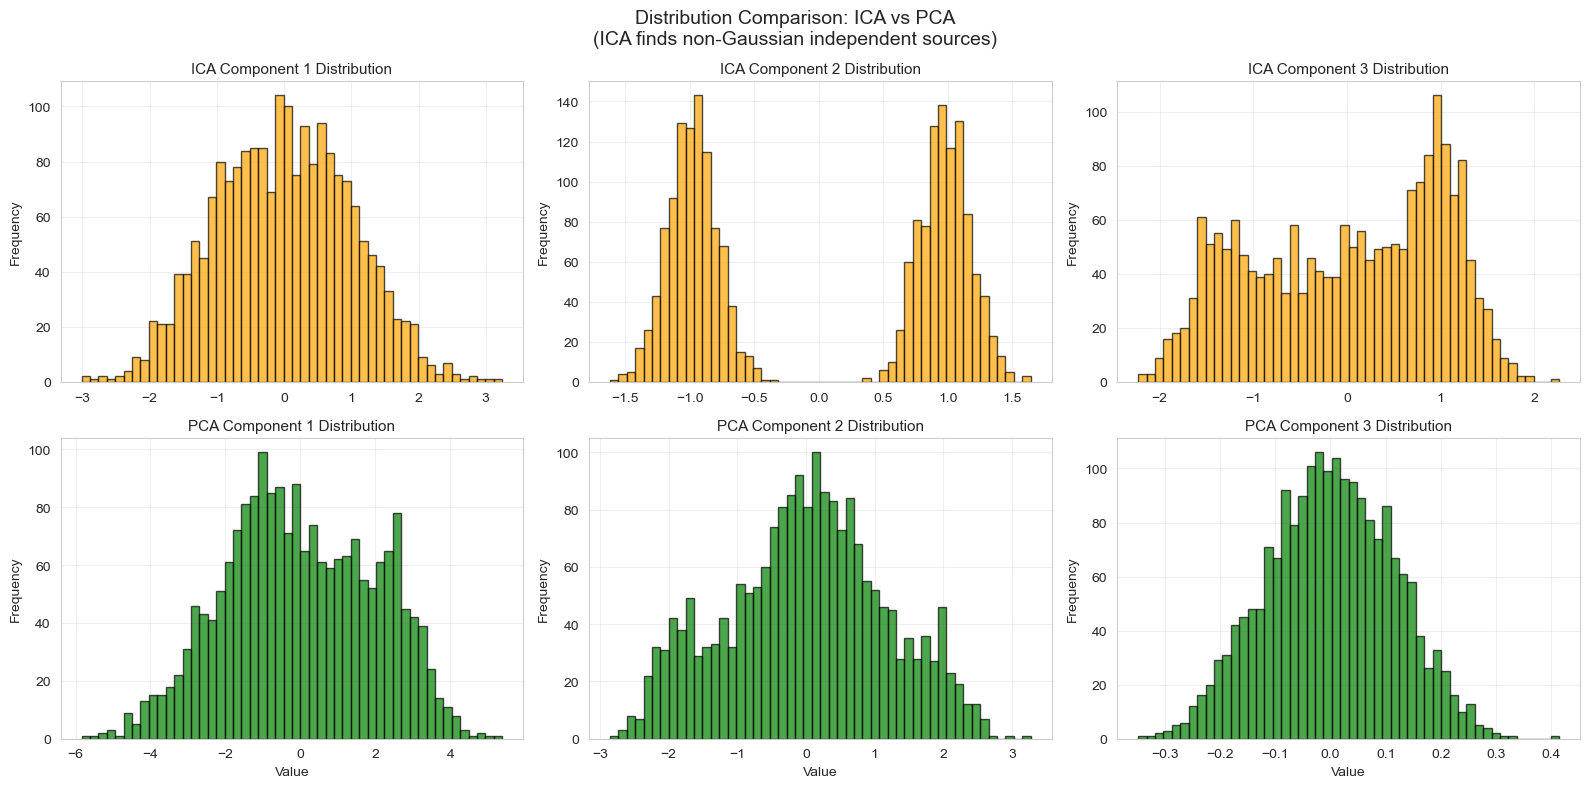


💡 Distribution Analysis:
  • ICA components: Non-Gaussian (independent sources)
  • PCA components: More Gaussian (mixtures)
  • Non-Gaussianity indicates successful separation!


In [41]:
# Visualize distributions (non-Gaussianity)
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

# ICA components distributions
for i in range(3):
    axes[0, i].hist(S_ica[:, i], bins=50, alpha=0.7, color='orange', edgecolor='black')
    axes[0, i].set_title(f'ICA Component {i+1} Distribution', fontsize=11)
    axes[0, i].set_ylabel('Frequency')
    axes[0, i].grid(True, alpha=0.3)

# PCA components distributions
for i in range(3):
    axes[1, i].hist(S_pca[:, i], bins=50, alpha=0.7, color='green', edgecolor='black')
    axes[1, i].set_title(f'PCA Component {i+1} Distribution', fontsize=11)
    axes[1, i].set_ylabel('Frequency')
    axes[1, i].set_xlabel('Value')
    axes[1, i].grid(True, alpha=0.3)

plt.suptitle('Distribution Comparison: ICA vs PCA\n(ICA finds non-Gaussian independent sources)', fontsize=14)
plt.tight_layout()
plt.show()

print("\n💡 Distribution Analysis:")
print("  • ICA components: Non-Gaussian (independent sources)")
print("  • PCA components: More Gaussian (mixtures)")
print("  • Non-Gaussianity indicates successful separation!")

## 📊 Section 5: ICA on Real Data (Digits)

### 5.1 Loading and Preprocessing Digits

In [45]:
# Load digits dataset
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

print("📊 Digits Dataset:")
print(f"Shape: {X_digits.shape}")
print(f"Features: {X_digits.shape[1]} pixels")
print(f"Classes: {len(np.unique(y_digits))}")

# Standardize
scaler = StandardScaler()
X_digits_scaled = scaler.fit_transform(X_digits)

📊 Digits Dataset:
Shape: (1797, 64)
Features: 64 pixels
Classes: 10


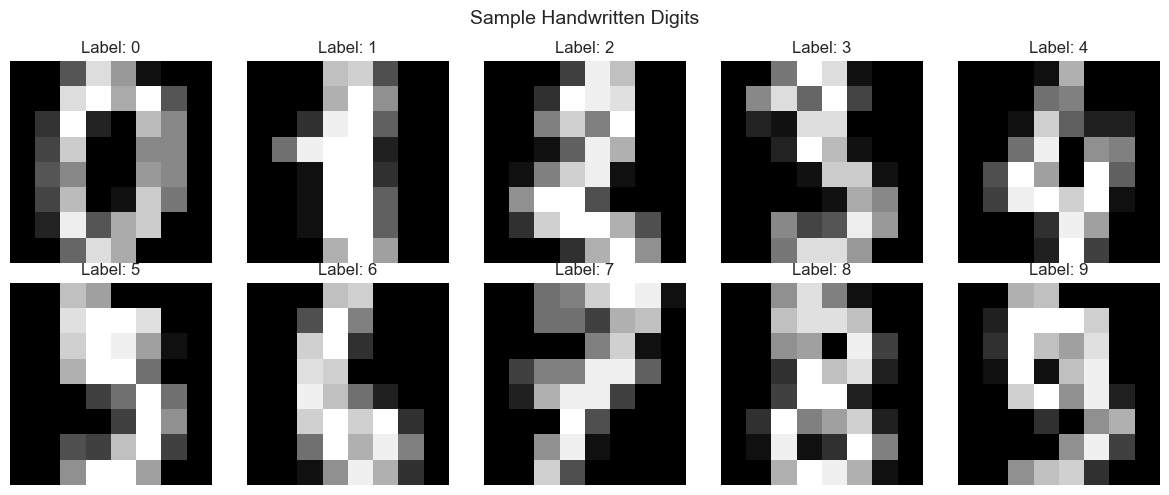

In [47]:
# Show sample digits
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {y_digits[i]}")
    ax.axis('off')
plt.suptitle("Sample Handwritten Digits", fontsize=14)
plt.tight_layout()
plt.show()

### 5.2 ICA vs PCA on Digits

In [52]:
# Apply ICA
n_components = 10
ica_digits = FastICA(n_components=n_components, random_state=42, max_iter=1000)
X_digits_ica = ica_digits.fit_transform(X_digits_scaled)

# Apply PCA
pca_digits = PCA(n_components=n_components)
X_digits_pca = pca_digits.fit_transform(X_digits_scaled)

print(f"\n📊 Dimensionality Reduction: 64 → {n_components} components")
print(f"ICA shape: {X_digits_ica.shape}")
print(f"PCA shape: {X_digits_pca.shape}")
print(f"PCA variance explained: {pca_digits.explained_variance_ratio_.sum():.2%}")


📊 Dimensionality Reduction: 64 → 10 components
ICA shape: (1797, 10)
PCA shape: (1797, 10)
PCA variance explained: 58.87%


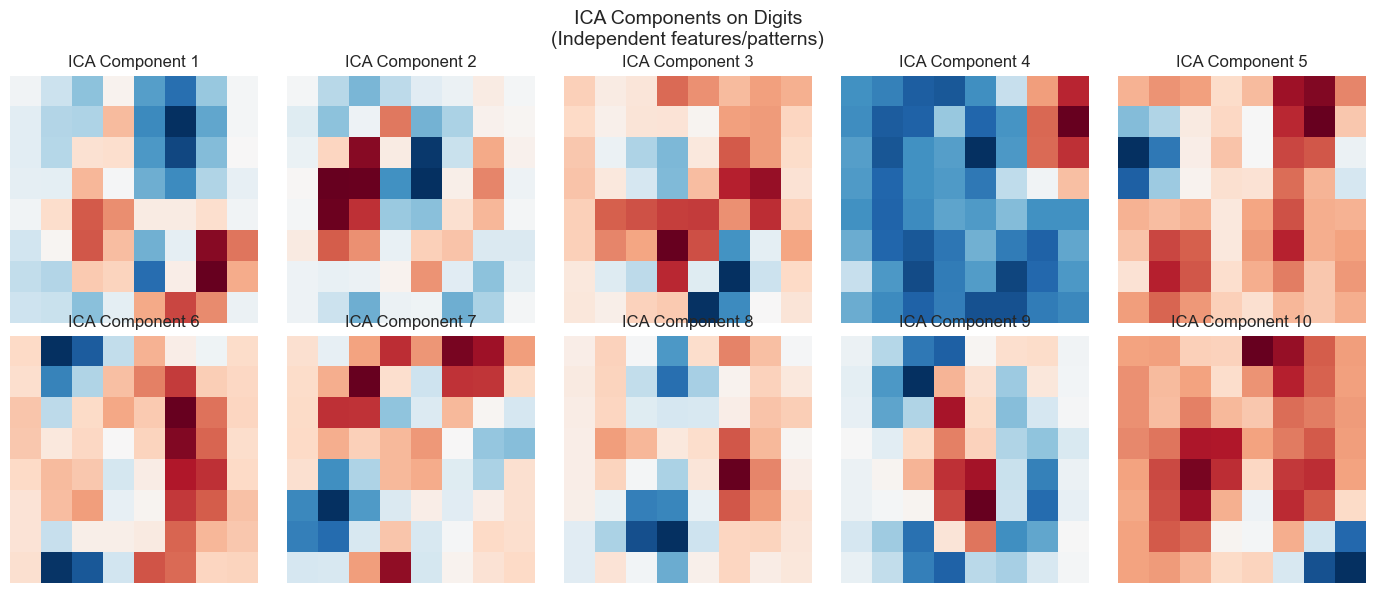

In [54]:
# Visualize ICA components as images
fig, axes = plt.subplots(2, 5, figsize=(14, 6))

for i, ax in enumerate(axes.flat):
    component_image = ica_digits.mixing_[:, i].reshape(8, 8)
    ax.imshow(component_image, cmap='RdBu_r')
    ax.set_title(f'ICA Component {i+1}')
    ax.axis('off')

plt.suptitle('ICA Components on Digits\n(Independent features/patterns)', fontsize=14)
plt.tight_layout()
plt.show()

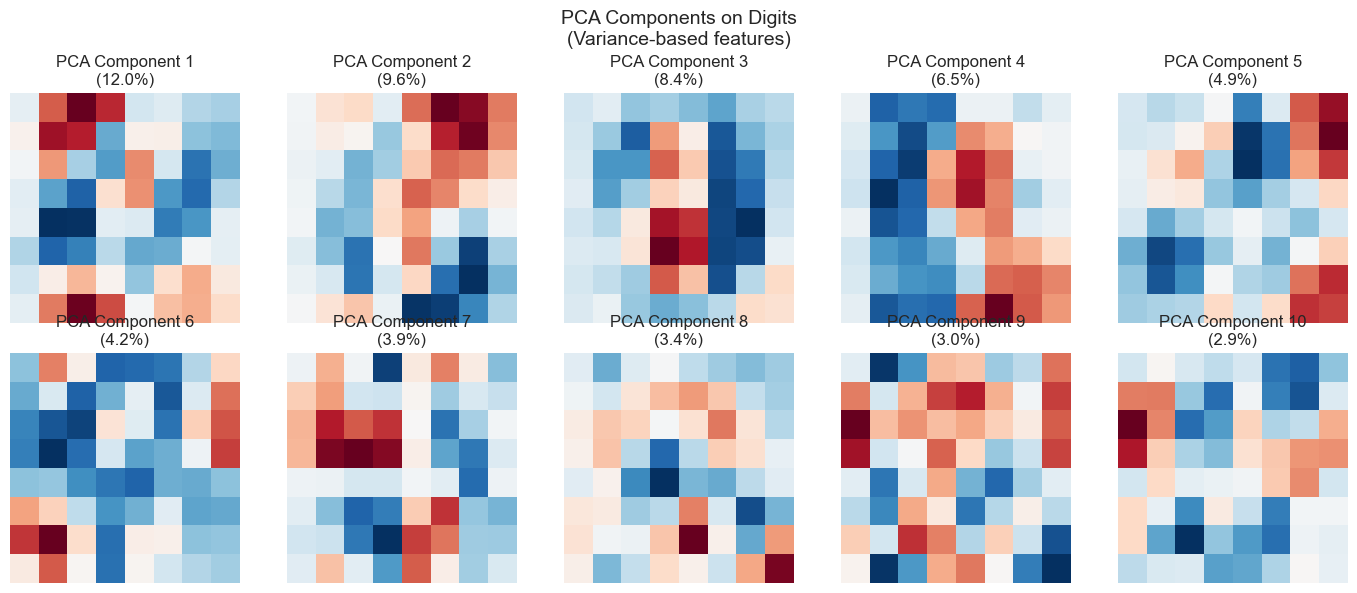


💡 Component Comparison:
  • ICA: Finds independent patterns (edges, strokes, features)
  • PCA: Finds variance patterns (ordered by importance)
  • ICA components more interpretable for features
  • PCA components better for compression


In [56]:
# Visualize PCA components as images
fig, axes = plt.subplots(2, 5, figsize=(14, 6))

for i, ax in enumerate(axes.flat):
    component_image = pca_digits.components_[i].reshape(8, 8)
    ax.imshow(component_image, cmap='RdBu_r')
    ax.set_title(f'PCA Component {i+1}\n({pca_digits.explained_variance_ratio_[i]:.1%})')
    ax.axis('off')

plt.suptitle('PCA Components on Digits\n(Variance-based features)', fontsize=14)
plt.tight_layout()
plt.show()

print("\n💡 Component Comparison:")
print("  • ICA: Finds independent patterns (edges, strokes, features)")
print("  • PCA: Finds variance patterns (ordered by importance)")
print("  • ICA components more interpretable for features")
print("  • PCA components better for compression")

### 5.3 Reconstruction Quality

In [59]:
# Reconstruct digits using ICA and PCA
digit_idx = 0
original_digit = digits.images[digit_idx]

# ICA reconstruction
ica_reconstructed = ica_digits.inverse_transform(X_digits_ica[digit_idx].reshape(1, -1))
ica_reconstructed = scaler.inverse_transform(ica_reconstructed).reshape(8, 8)

# PCA reconstruction  
pca_reconstructed = pca_digits.inverse_transform(X_digits_pca[digit_idx].reshape(1, -1))
pca_reconstructed = scaler.inverse_transform(pca_reconstructed).reshape(8, 8)

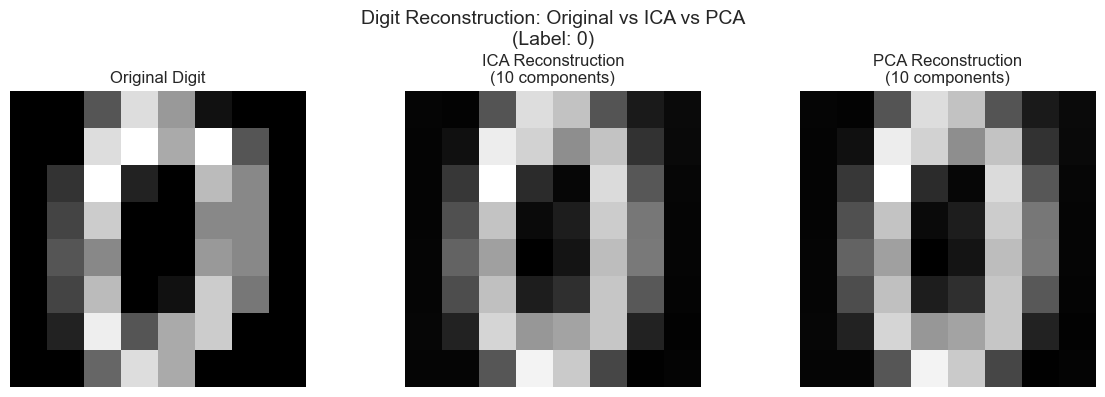


📊 Reconstruction Error (MSE):
ICA: 0.117405
PCA: 0.117405

💡 PCA typically has lower reconstruction error
   (optimized for variance, not independence)


In [61]:
# Visualize reconstructions
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(original_digit, cmap='gray')
axes[0].set_title('Original Digit')
axes[0].axis('off')

axes[1].imshow(ica_reconstructed, cmap='gray')
axes[1].set_title(f'ICA Reconstruction\n({n_components} components)')
axes[1].axis('off')

axes[2].imshow(pca_reconstructed, cmap='gray')
axes[2].set_title(f'PCA Reconstruction\n({n_components} components)')
axes[2].axis('off')

plt.suptitle(f'Digit Reconstruction: Original vs ICA vs PCA\n(Label: {y_digits[digit_idx]})', fontsize=14)
plt.tight_layout()
plt.show()

# Calculate reconstruction errors
original_flat = X_digits_scaled[digit_idx]
ica_flat = scaler.transform(ica_reconstructed.reshape(1, -1))[0]
pca_flat = scaler.transform(pca_reconstructed.reshape(1, -1))[0]

ica_error = np.mean((original_flat - ica_flat)**2)
pca_error = np.mean((original_flat - pca_flat)**2)

print(f"\n📊 Reconstruction Error (MSE):")
print(f"ICA: {ica_error:.6f}")
print(f"PCA: {pca_error:.6f}")
print(f"\n💡 PCA typically has lower reconstruction error")
print("   (optimized for variance, not independence)")

## 📊 Section 6: Non-Gaussianity Measures

### 6.1 Kurtosis Analysis

In [65]:
from scipy.stats import kurtosis

# Calculate kurtosis for sources and components
print("📊 Kurtosis Analysis (Measure of Non-Gaussianity)")
print("="*70)
print("Kurtosis = 0: Gaussian")
print("Kurtosis < 0: Sub-Gaussian (e.g., uniform)")
print("Kurtosis > 0: Super-Gaussian (e.g., sparse, peaky)")
print("\n" + "="*70)

print("\nOriginal Sources:")
for i in range(3):
    kurt = kurtosis(S[:, i])
    print(f"Source {i+1}: {kurt:.4f}")

print("\nMixed Observations:")
for i in range(3):
    kurt = kurtosis(X[:, i])
    print(f"Observation {i+1}: {kurt:.4f}")

print("\nICA Components:")
for i in range(3):
    kurt = kurtosis(S_ica[:, i])
    print(f"ICA Component {i+1}: {kurt:.4f}")

print("\nPCA Components:")
for i in range(3):
    kurt = kurtosis(S_pca[:, i])
    print(f"PCA Component {i+1}: {kurt:.4f}")

print("\n💡 Observations:")
print("  • Mixed signals: More Gaussian (kurtosis closer to 0)")
print("  • ICA components: Non-Gaussian (high |kurtosis|)")
print("  • PCA components: More Gaussian than ICA")
print("  • ICA successfully maximizes non-Gaussianity!")

📊 Kurtosis Analysis (Measure of Non-Gaussianity)
Kurtosis = 0: Gaussian
Kurtosis < 0: Sub-Gaussian (e.g., uniform)
Kurtosis > 0: Super-Gaussian (e.g., sparse, peaky)


Original Sources:
Source 1: -1.1649
Source 2: -1.8477
Source 3: -0.9262

Mixed Observations:
Observation 1: -0.6485
Observation 2: -1.4428
Observation 3: -0.5953

ICA Components:
ICA Component 1: -0.3872
ICA Component 2: -1.8521
ICA Component 3: -1.1784

PCA Components:
PCA Component 1: -0.6583
PCA Component 2: -0.5502
PCA Component 3: -0.3218

💡 Observations:
  • Mixed signals: More Gaussian (kurtosis closer to 0)
  • ICA components: Non-Gaussian (high |kurtosis|)
  • PCA components: More Gaussian than ICA
  • ICA successfully maximizes non-Gaussianity!


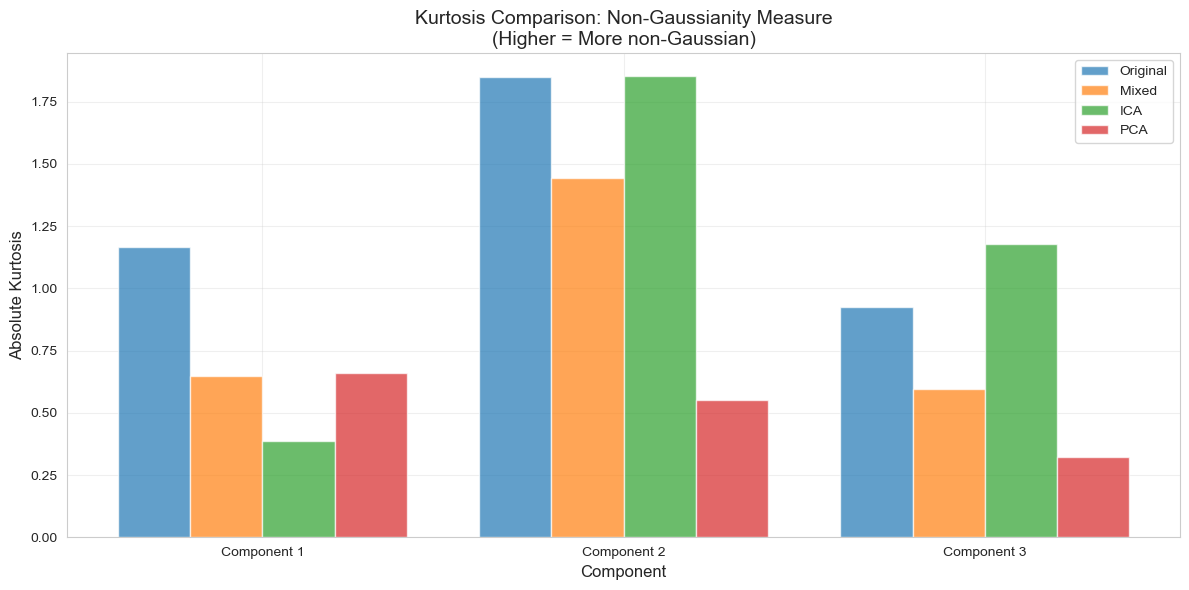

In [67]:
# Visualize kurtosis
kurtosis_data = {
    'Original': [kurtosis(S[:, i]) for i in range(3)],
    'Mixed': [kurtosis(X[:, i]) for i in range(3)],
    'ICA': [kurtosis(S_ica[:, i]) for i in range(3)],
    'PCA': [kurtosis(S_pca[:, i]) for i in range(3)]
}

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(3)
width = 0.2

for i, (label, values) in enumerate(kurtosis_data.items()):
    ax.bar(x + i*width, np.abs(values), width, label=label, alpha=0.7)

ax.set_xlabel('Component', fontsize=12)
ax.set_ylabel('Absolute Kurtosis', fontsize=12)
ax.set_title('Kurtosis Comparison: Non-Gaussianity Measure\n(Higher = More non-Gaussian)', fontsize=14)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(['Component 1', 'Component 2', 'Component 3'])
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 6.2 Histogram Comparison

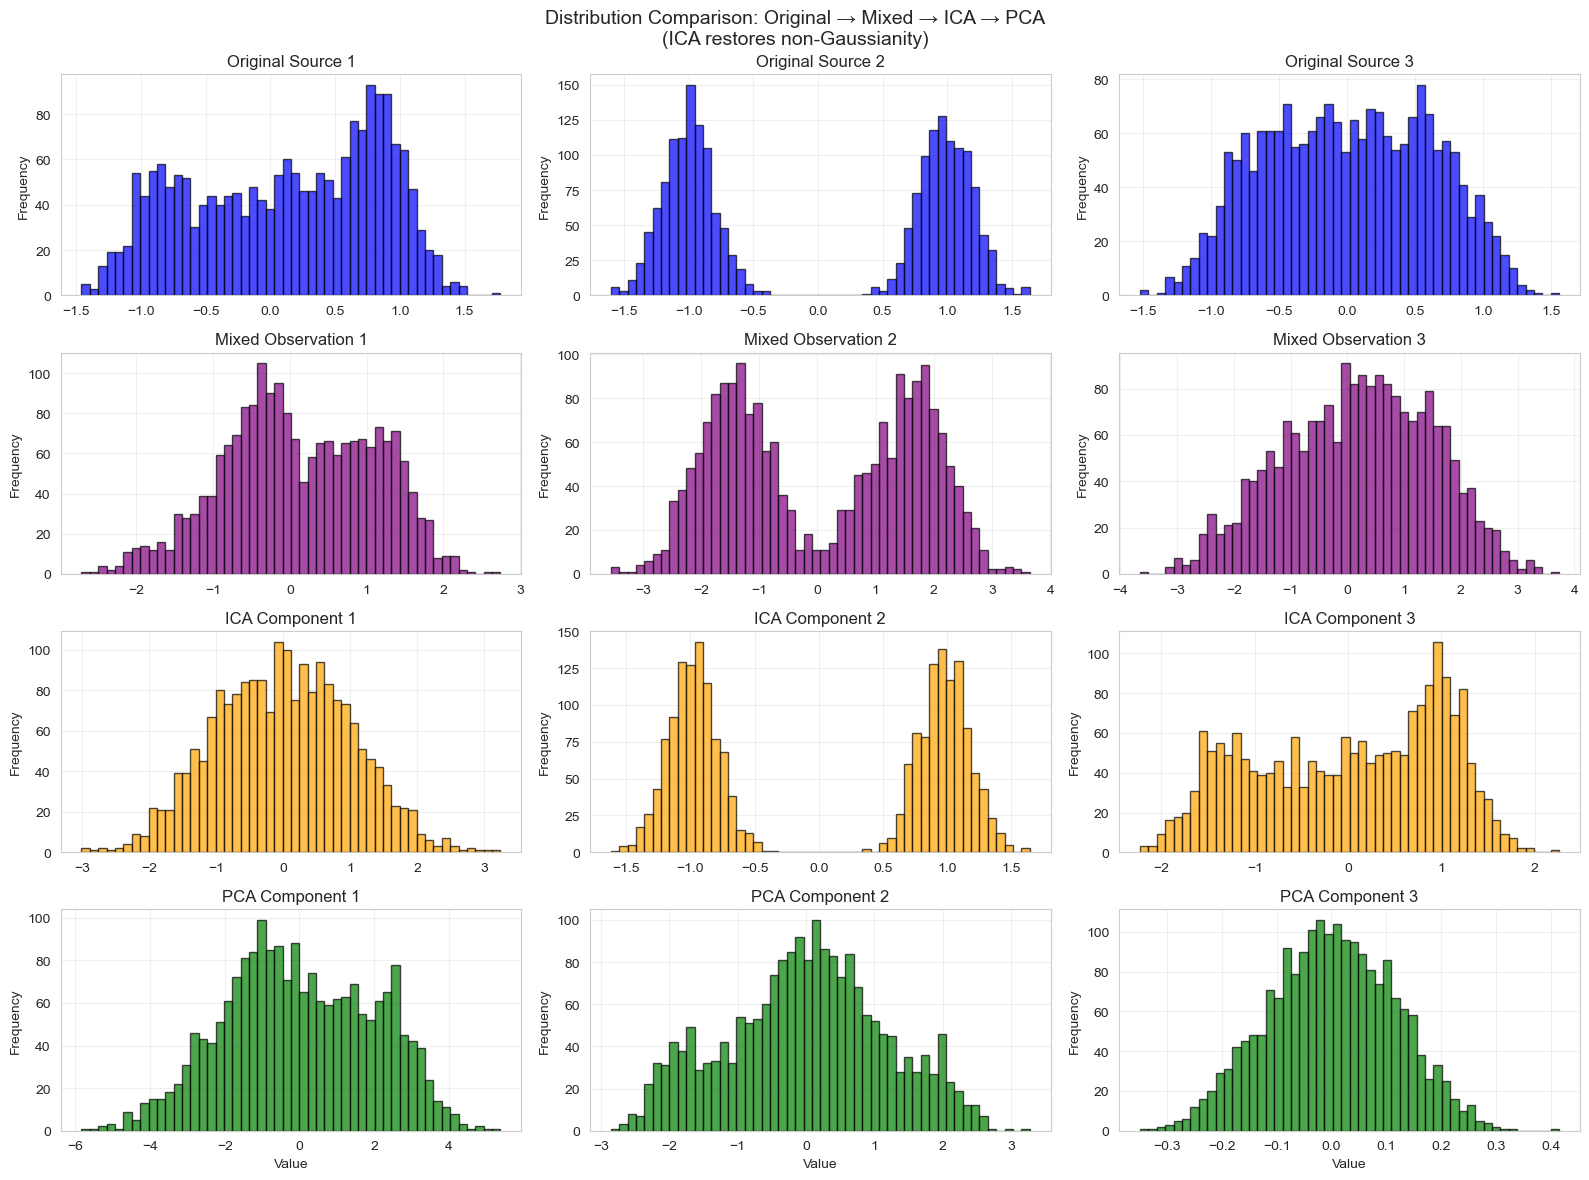

In [70]:
# Compare distributions of original, mixed, ICA, and PCA
fig, axes = plt.subplots(4, 3, figsize=(16, 12))

# Row 1: Original sources
for i in range(3):
    axes[0, i].hist(S[:, i], bins=50, alpha=0.7, color='blue', edgecolor='black')
    axes[0, i].set_title(f'Original Source {i+1}')
    axes[0, i].set_ylabel('Frequency')
    axes[0, i].grid(True, alpha=0.3)

# Row 2: Mixed observations
for i in range(3):
    axes[1, i].hist(X[:, i], bins=50, alpha=0.7, color='purple', edgecolor='black')
    axes[1, i].set_title(f'Mixed Observation {i+1}')
    axes[1, i].set_ylabel('Frequency')
    axes[1, i].grid(True, alpha=0.3)

# Row 3: ICA components
for i in range(3):
    axes[2, i].hist(S_ica[:, i], bins=50, alpha=0.7, color='orange', edgecolor='black')
    axes[2, i].set_title(f'ICA Component {i+1}')
    axes[2, i].set_ylabel('Frequency')
    axes[2, i].grid(True, alpha=0.3)

# Row 4: PCA components
for i in range(3):
    axes[3, i].hist(S_pca[:, i], bins=50, alpha=0.7, color='green', edgecolor='black')
    axes[3, i].set_title(f'PCA Component {i+1}')
    axes[3, i].set_ylabel('Frequency')
    axes[3, i].set_xlabel('Value')
    axes[3, i].grid(True, alpha=0.3)

plt.suptitle('Distribution Comparison: Original → Mixed → ICA → PCA\n(ICA restores non-Gaussianity)', fontsize=14)
plt.tight_layout()
plt.show()

## 📊 Section 7: Real-World Application - Image Separation

### 7.1 Creating Mixed Images

In [74]:
# Create artificial mixed images
from sklearn.datasets import load_sample_images

# Generate simple pattern images
img_size = 64
x = np.linspace(-3, 3, img_size)
y = np.linspace(-3, 3, img_size)
X_grid, Y_grid = np.meshgrid(x, y)

# Image 1: Horizontal stripes
img1 = np.sin(2 * np.pi * Y_grid)

# Image 2: Vertical stripes  
img2 = np.sin(2 * np.pi * X_grid)

# Image 3: Diagonal pattern
img3 = np.sin(2 * np.pi * (X_grid + Y_grid) / 2)

# Stack images
original_images = np.array([img1.flatten(), img2.flatten(), img3.flatten()])

print("📊 Created 3 Independent Pattern Images")
print(f"Image shape: {img_size}×{img_size}")
print(f"Flattened shape: {original_images.shape}")

📊 Created 3 Independent Pattern Images
Image shape: 64×64
Flattened shape: (3, 4096)


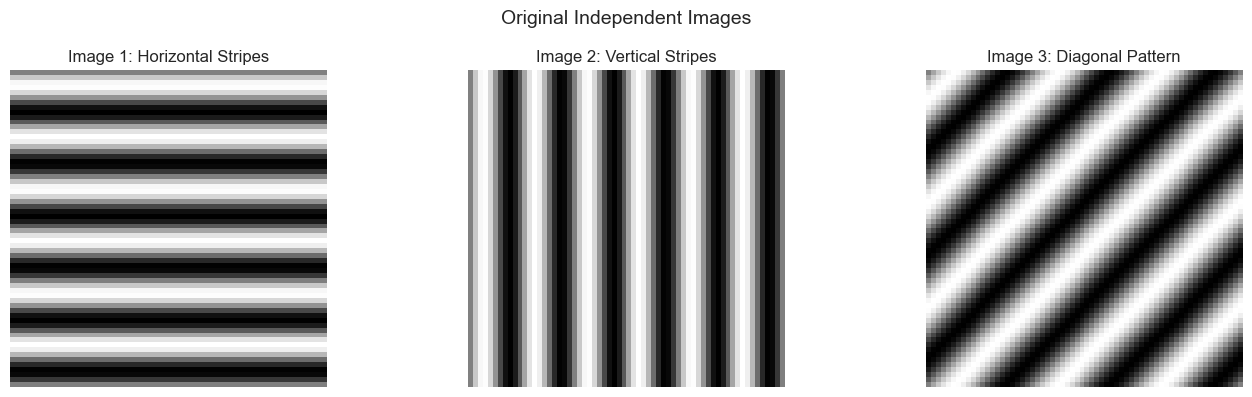

In [76]:
# Visualize original images
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

images = [img1, img2, img3]
titles = ['Image 1: Horizontal Stripes', 'Image 2: Vertical Stripes', 'Image 3: Diagonal Pattern']

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.suptitle('Original Independent Images', fontsize=14)
plt.tight_layout()
plt.show()

In [78]:
# Create mixed images
mixing_matrix_img = np.array([[1, 0.5, 0.5],
                               [0.5, 1, 0.5],
                               [0.5, 0.5, 1]])

mixed_images = np.dot(mixing_matrix_img, original_images)

print("\n📊 Mixed Images Created")
print(f"Mixing matrix:\n{mixing_matrix_img}")


📊 Mixed Images Created
Mixing matrix:
[[1.  0.5 0.5]
 [0.5 1.  0.5]
 [0.5 0.5 1. ]]


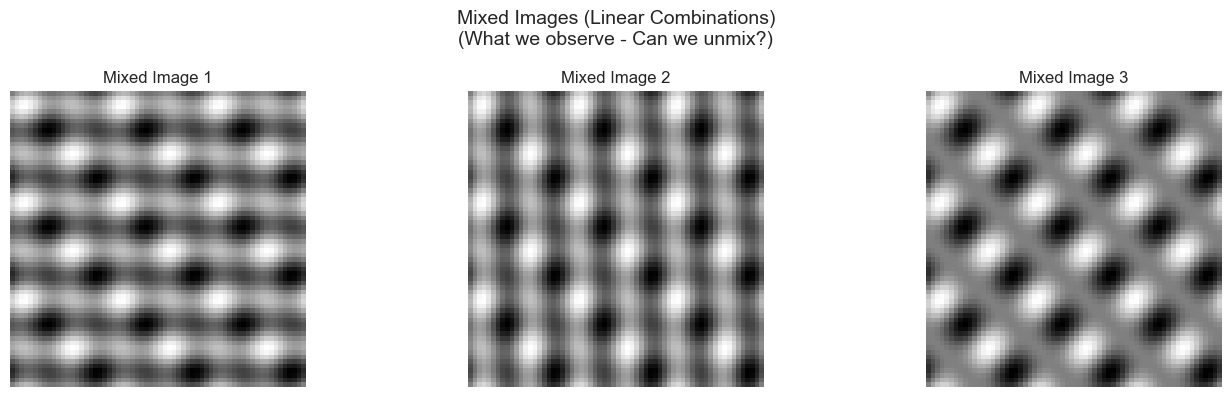

In [80]:
# Visualize mixed images
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

mix_titles = ['Mixed Image 1', 'Mixed Image 2', 'Mixed Image 3']

for i, (ax, title) in enumerate(zip(axes, mix_titles)):
    ax.imshow(mixed_images[i].reshape(img_size, img_size), cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.suptitle('Mixed Images (Linear Combinations)\n(What we observe - Can we unmix?)', fontsize=14)
plt.tight_layout()
plt.show()

### 7.2 Unmixing with ICA

In [83]:
# Apply ICA to unmix images
ica_img = FastICA(n_components=3, random_state=42, max_iter=1000)
unmixed_images = ica_img.fit_transform(mixed_images.T).T

print("📊 ICA Applied to Unmix Images")
print(f"Recovered images shape: {unmixed_images.shape}")

📊 ICA Applied to Unmix Images
Recovered images shape: (3, 4096)


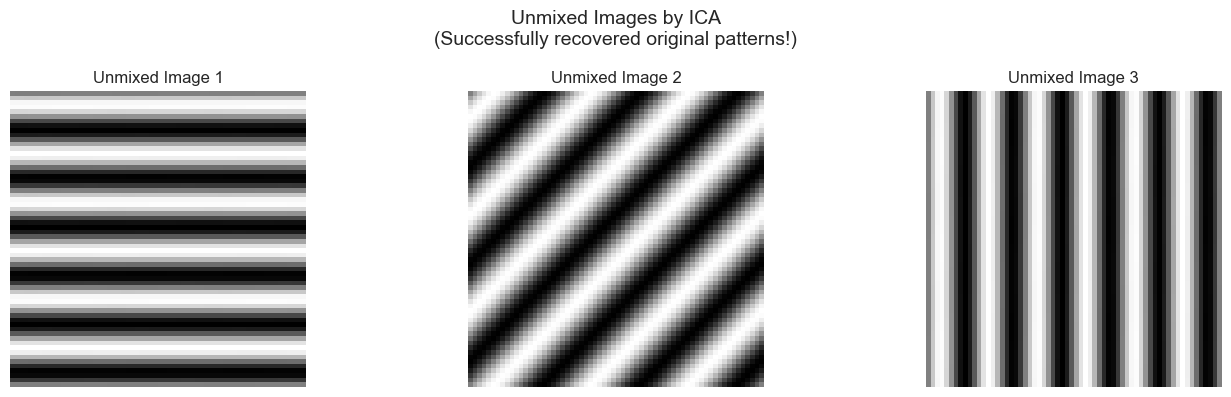


💡 ICA Success:
  • Successfully separated mixed images
  • Recovered original independent patterns
  • Order and scaling may differ (ambiguity)
  • But patterns are clearly visible!


In [85]:
# Visualize unmixed images
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

unmix_titles = ['Unmixed Image 1', 'Unmixed Image 2', 'Unmixed Image 3']

for i, (ax, title) in enumerate(zip(axes, unmix_titles)):
    ax.imshow(unmixed_images[i].reshape(img_size, img_size), cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.suptitle('Unmixed Images by ICA\n(Successfully recovered original patterns!)', fontsize=14)
plt.tight_layout()
plt.show()

print("\n💡 ICA Success:")
print("  • Successfully separated mixed images")
print("  • Recovered original independent patterns")
print("  • Order and scaling may differ (ambiguity)")
print("  • But patterns are clearly visible!")

### 7.3 Complete Comparison: Original → Mixed → Unmixed

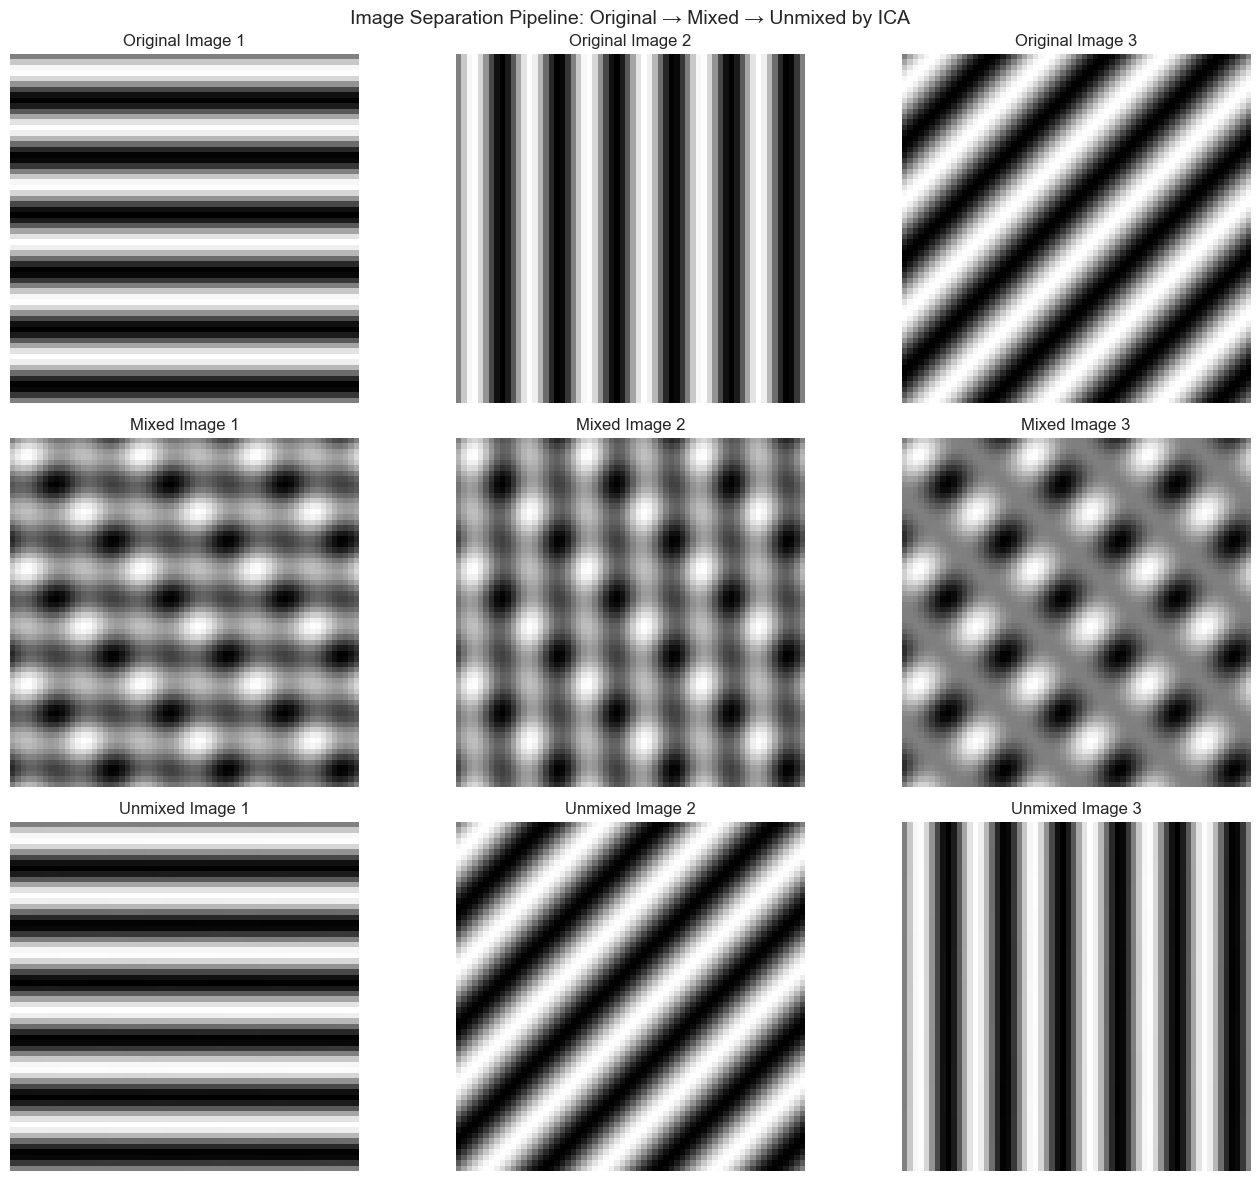

In [89]:
# Side-by-side comparison
fig, axes = plt.subplots(3, 3, figsize=(14, 12))

# Row 1: Original images
for i in range(3):
    axes[0, i].imshow(images[i], cmap='gray')
    axes[0, i].set_title(f'Original Image {i+1}')
    axes[0, i].axis('off')

# Row 2: Mixed images
for i in range(3):
    axes[1, i].imshow(mixed_images[i].reshape(img_size, img_size), cmap='gray')
    axes[1, i].set_title(f'Mixed Image {i+1}')
    axes[1, i].axis('off')

# Row 3: Unmixed images
for i in range(3):
    axes[2, i].imshow(unmixed_images[i].reshape(img_size, img_size), cmap='gray')
    axes[2, i].set_title(f'Unmixed Image {i+1}')
    axes[2, i].axis('off')

plt.suptitle('Image Separation Pipeline: Original → Mixed → Unmixed by ICA', fontsize=14)
plt.tight_layout()
plt.show()

## 📊 Section 8: Convergence and Algorithm Analysis

### 8.1 Convergence Behavior

In [93]:
# Test ICA with different max_iter
iterations = [10, 50, 100, 200, 500, 1000]
convergence_results = []

for max_iter in iterations:
    ica_test = FastICA(n_components=3, random_state=42, max_iter=max_iter)
    try:
        S_test = ica_test.fit_transform(X)
        converged = True
        n_iter = ica_test.n_iter_
    except:
        converged = False
        n_iter = max_iter
    
    convergence_results.append({
        'max_iter': max_iter,
        'converged': converged,
        'n_iter': n_iter
    })

convergence_df = pd.DataFrame(convergence_results)

print("📊 Convergence Analysis:")
print("="*70)
print(convergence_df.to_string(index=False))

print("\n💡 FastICA typically converges quickly (<200 iterations)")

📊 Convergence Analysis:
 max_iter  converged  n_iter
       10       True       6
       50       True       6
      100       True       6
      200       True       6
      500       True       6
     1000       True       6

💡 FastICA typically converges quickly (<200 iterations)


### 8.2 Sensitivity to Initialization

In [97]:
# Test with different random states
random_states = [0, 42, 123, 456, 789]
init_results = []

for rs in random_states:
    ica_test = FastICA(n_components=3, random_state=rs, max_iter=1000)
    S_test = ica_test.fit_transform(X)
    
    # Calculate correlation with original sources (after normalization)
    corr_sum = 0
    for i in range(3):
        max_corr = max([abs(np.corrcoef(normalize(S[:, i]), 
                                        normalize(S_test[:, j]))[0, 1]) 
                       for j in range(3)])
        corr_sum += max_corr
    
    avg_corr = corr_sum / 3
    
    init_results.append({
        'random_state': rs,
        'avg_correlation': avg_corr,
        'n_iter': ica_test.n_iter_
    })

init_df = pd.DataFrame(init_results)

print("\n📊 Sensitivity to Initialization:")
print("="*70)
print(init_df.to_string(index=False))

print("\n💡 ICA is relatively stable across different initializations")
print("   (High correlation with original sources)")


📊 Sensitivity to Initialization:
 random_state  avg_correlation  n_iter
            0         0.943548       3
           42         0.943555       6
          123         0.943556       3
          456         0.943550       3
          789         0.943537       3

💡 ICA is relatively stable across different initializations
   (High correlation with original sources)


## 📊 Section 9: Hyperparameter Tuning

### 9.1 Number of Components

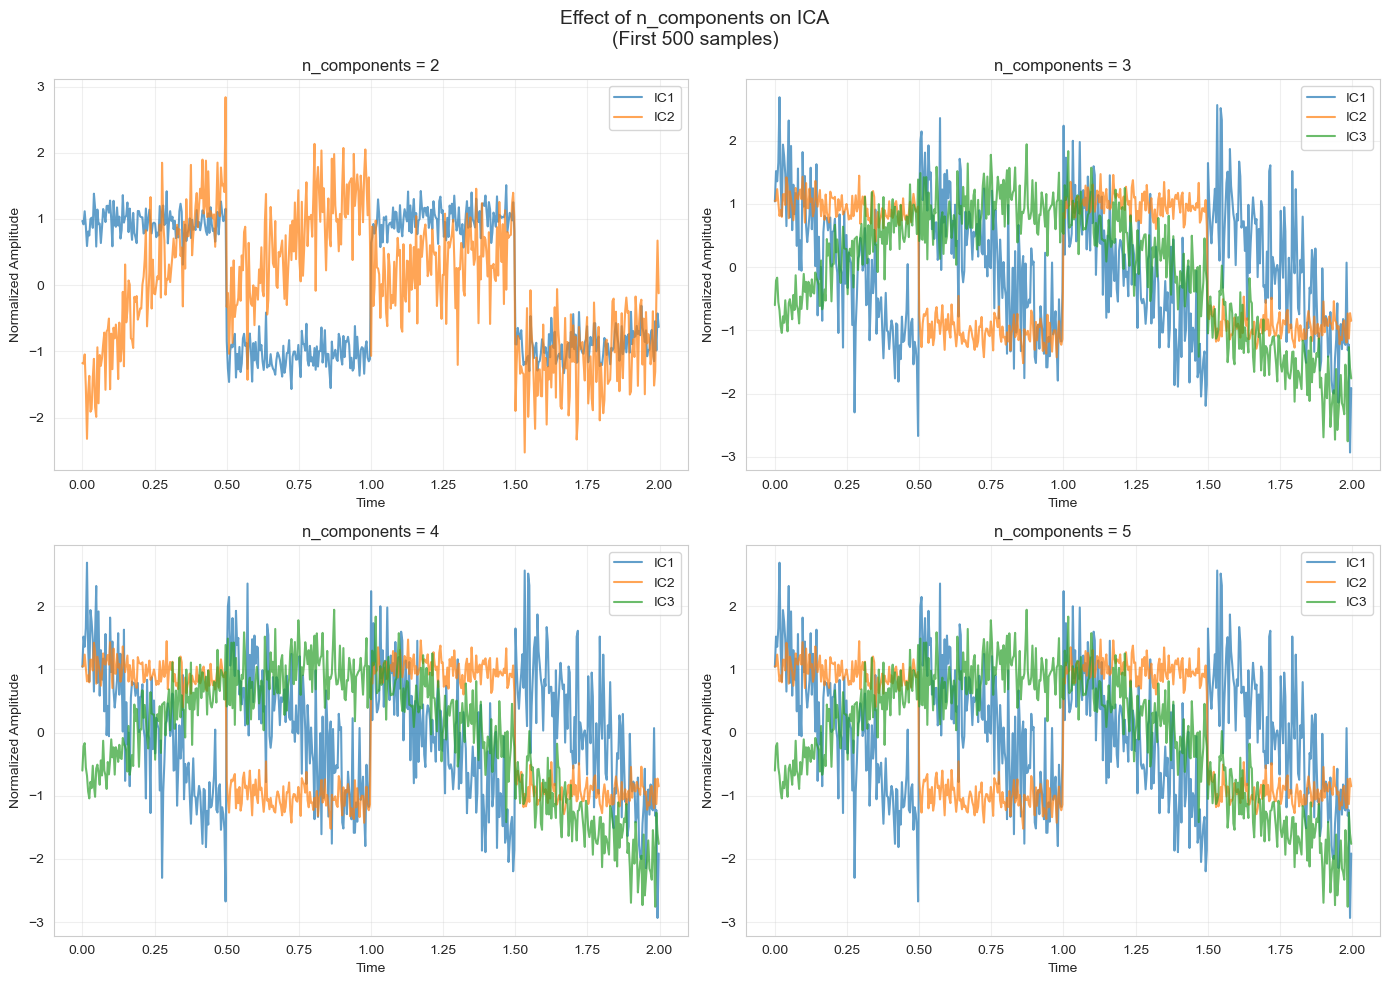


💡 Choosing n_components:
  • Should match number of true sources (if known)
  • More components = more computation
  • Fewer components = may miss sources


In [101]:
# Test different numbers of components
n_components_range = [2, 3, 4, 5]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, n_comp in enumerate(n_components_range):
    ica_test = FastICA(n_components=n_comp, random_state=42, max_iter=1000)
    S_test = ica_test.fit_transform(X)
    
    # Plot first 3 components
    ax = axes[idx]
    for i in range(min(3, n_comp)):
        ax.plot(time[:500], normalize(S_test[:500, i]), 
               label=f'IC{i+1}', linewidth=1.5, alpha=0.7)
    
    ax.set_title(f'n_components = {n_comp}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Normalized Amplitude')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('Effect of n_components on ICA\n(First 500 samples)', fontsize=14)
plt.tight_layout()
plt.show()

print("\n💡 Choosing n_components:")
print("  • Should match number of true sources (if known)")
print("  • More components = more computation")
print("  • Fewer components = may miss sources")

### 9.2 Algorithm Variants

In [105]:
# Test different ICA algorithms
algorithms = ['parallel', 'deflation']
algorithm_results = []

for algo in algorithms:
    ica_test = FastICA(n_components=3, algorithm=algo, random_state=42, max_iter=1000)
    
    import time as time_module
    start = time_module.time()
    S_test = ica_test.fit_transform(X)
    elapsed = time_module.time() - start
    
    algorithm_results.append({
        'algorithm': algo,
        'time_seconds': elapsed,
        'n_iter': ica_test.n_iter_
    })

algo_df = pd.DataFrame(algorithm_results)

print("📊 Algorithm Comparison:")
print("="*70)
print(algo_df.to_string(index=False))

print("\n💡 Algorithm Types:")
print("  • parallel: Extracts all components simultaneously (faster)")
print("  • deflation: Extracts components one-by-one (more stable)")

📊 Algorithm Comparison:
algorithm  time_seconds  n_iter
 parallel      0.005002       6
deflation      0.099991       4

💡 Algorithm Types:
  • parallel: Extracts all components simultaneously (faster)
  • deflation: Extracts components one-by-one (more stable)


### 9.3 Non-linearity Function

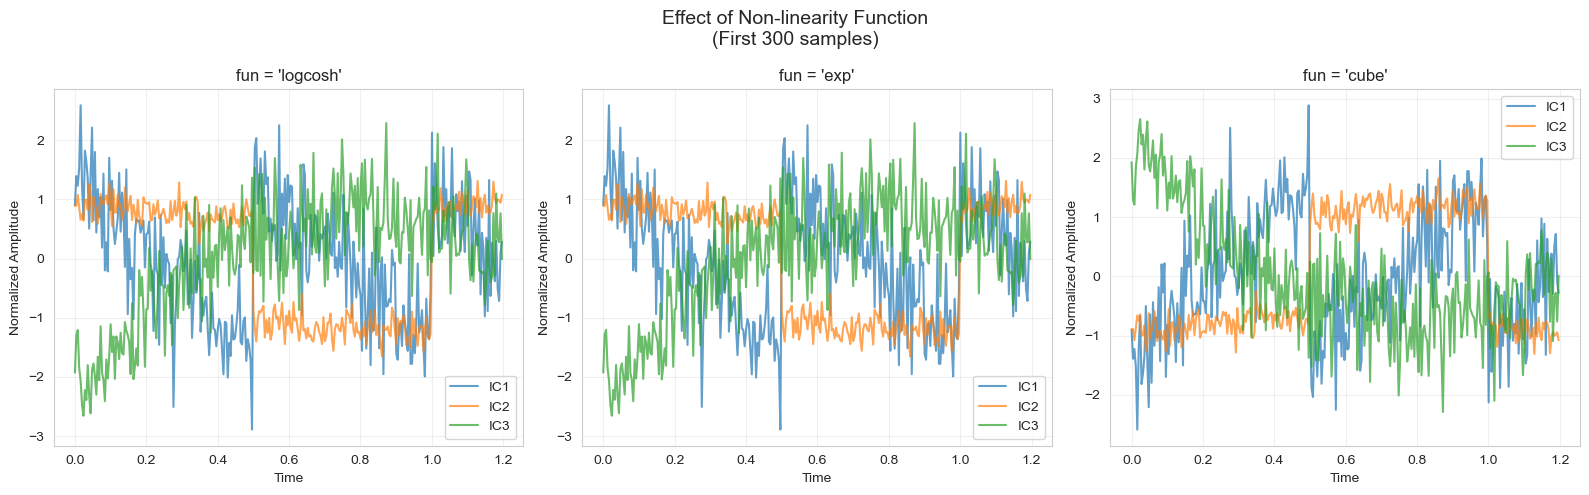


💡 Non-linearity Functions:
  • logcosh: General purpose (default, robust)
  • exp: Good for super-Gaussian sources
  • cube: Good for sub-Gaussian sources


In [108]:
# Test different fun (non-linearity) options
fun_options = ['logcosh', 'exp', 'cube']

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, fun in enumerate(fun_options):
    ica_test = FastICA(n_components=3, fun=fun, random_state=42, max_iter=1000)
    S_test = ica_test.fit_transform(X)
    
    ax = axes[idx]
    for i in range(3):
        ax.plot(time[:300], normalize(S_test[:300, i]), 
               label=f'IC{i+1}', linewidth=1.5, alpha=0.7)
    
    ax.set_title(f"fun = '{fun}'")
    ax.set_xlabel('Time')
    ax.set_ylabel('Normalized Amplitude')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('Effect of Non-linearity Function\n(First 300 samples)', fontsize=14)
plt.tight_layout()
plt.show()

print("\n💡 Non-linearity Functions:")
print("  • logcosh: General purpose (default, robust)")
print("  • exp: Good for super-Gaussian sources")
print("  • cube: Good for sub-Gaussian sources")

## 📊 Section 10: Limitations and Edge Cases

### 10.1 Gaussian Sources (Failure Case)

In [112]:
# Create Gaussian sources (ICA should fail)
np.random.seed(42)

# Three Gaussian sources
s1_gaussian = np.random.randn(1000)
s2_gaussian = np.random.randn(1000)
s3_gaussian = np.random.randn(1000)

S_gaussian = np.c_[s1_gaussian, s2_gaussian, s3_gaussian]

# Mix them
A_gauss = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])
X_gaussian = np.dot(S_gaussian, A_gauss.T)

# Try ICA
ica_gauss = FastICA(n_components=3, random_state=42, max_iter=1000)
S_ica_gauss = ica_gauss.fit_transform(X_gaussian)

print("📊 ICA on Gaussian Sources:")
print("="*70)

# Check kurtosis
print("\nOriginal Gaussian Sources Kurtosis:")
for i in range(3):
    print(f"Source {i+1}: {kurtosis(S_gaussian[:, i]):.4f}")

print("\nICA Recovered Components Kurtosis:")
for i in range(3):
    print(f"Component {i+1}: {kurtosis(S_ica_gauss[:, i]):.4f}")

print("\n⚠️ Problem: Gaussian sources have near-zero kurtosis")
print("   ICA cannot separate Gaussian sources!")

📊 ICA on Gaussian Sources:

Original Gaussian Sources Kurtosis:
Source 1: 0.0662
Source 2: 0.0521
Source 3: 0.1653

ICA Recovered Components Kurtosis:
Component 1: 0.1266
Component 2: 0.3119
Component 3: -0.3108

⚠️ Problem: Gaussian sources have near-zero kurtosis
   ICA cannot separate Gaussian sources!


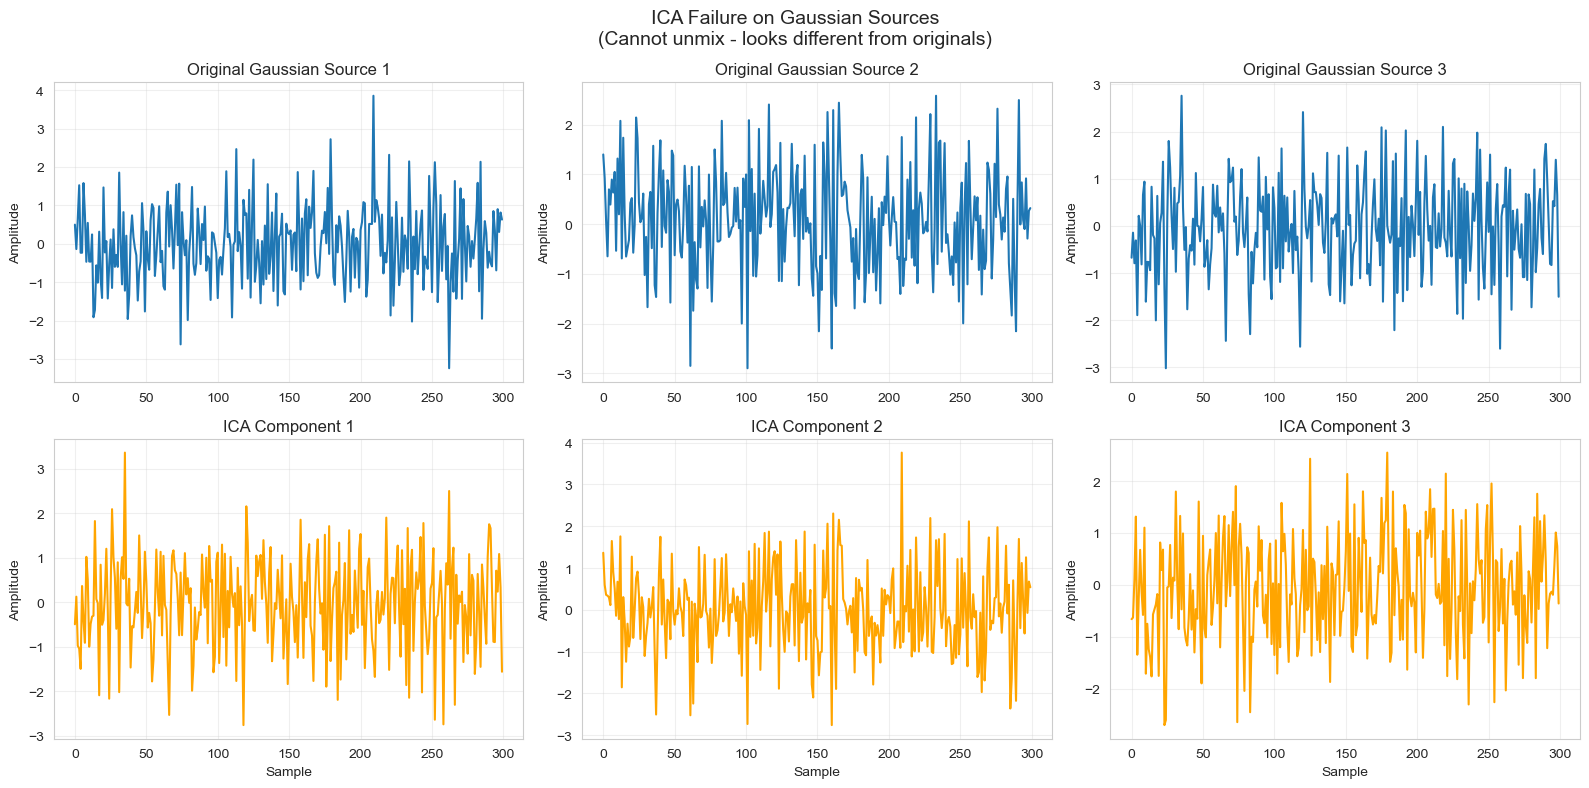


💡 Key Limitation:
  • ICA requires non-Gaussian sources
  • Gaussian mixtures remain Gaussian
  • No unique solution for Gaussian case


In [114]:
# Visualize failure
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

# Original Gaussian sources
for i in range(3):
    axes[0, i].plot(S_gaussian[:300, i], linewidth=1.5)
    axes[0, i].set_title(f'Original Gaussian Source {i+1}')
    axes[0, i].set_ylabel('Amplitude')
    axes[0, i].grid(True, alpha=0.3)

# ICA "recovered" components
for i in range(3):
    axes[1, i].plot(S_ica_gauss[:300, i], color='orange', linewidth=1.5)
    axes[1, i].set_title(f'ICA Component {i+1}')
    axes[1, i].set_ylabel('Amplitude')
    axes[1, i].set_xlabel('Sample')
    axes[1, i].grid(True, alpha=0.3)

plt.suptitle('ICA Failure on Gaussian Sources\n(Cannot unmix - looks different from originals)', fontsize=14)
plt.tight_layout()
plt.show()

print("\n💡 Key Limitation:")
print("  • ICA requires non-Gaussian sources")
print("  • Gaussian mixtures remain Gaussian")
print("  • No unique solution for Gaussian case")

### 10.2 Fewer Observations than Sources

In [117]:
# Underdetermined case: 2 observations, 3 sources
print("\n📊 Underdetermined ICA (m < n):")
print("="*70)

# Use only 2 observations
X_under = X[:, :2]  # Only first 2 mixtures

print(f"Sources: 3")
print(f"Observations: {X_under.shape[1]}")
print("\n⚠️ Cannot recover 3 sources from 2 observations!")
print("   Need at least as many observations as sources (m ≥ n)")

# Try ICA (will only recover 2 components)
ica_under = FastICA(n_components=2, random_state=42, max_iter=1000)
S_under = ica_under.fit_transform(X_under)

print(f"\nICA can only recover: {S_under.shape[1]} components")
print("One source is permanently lost!")


📊 Underdetermined ICA (m < n):
Sources: 3
Observations: 2

⚠️ Cannot recover 3 sources from 2 observations!
   Need at least as many observations as sources (m ≥ n)

ICA can only recover: 2 components
One source is permanently lost!


## 📊 Section 11: Production & Best Practices

### 11.1 Complete ICA Pipeline

In [122]:
from sklearn.pipeline import Pipeline

# Create production pipeline
ica_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ica', FastICA(n_components=3, random_state=42, max_iter=1000))
])

# Fit and transform
S_pipeline = ica_pipeline.fit_transform(X)

print("📊 Production ICA Pipeline:")
print("="*70)
print("Steps:")
print("  1. StandardScaler: Center and scale data")
print("  2. FastICA: Extract independent components")
print(f"\nOutput shape: {S_pipeline.shape}")
print("✅ Pipeline ready for production!")

📊 Production ICA Pipeline:
Steps:
  1. StandardScaler: Center and scale data
  2. FastICA: Extract independent components

Output shape: (2000, 3)
✅ Pipeline ready for production!


### 11.2 Best Practices Checklist

In [125]:
print("\n" + "="*80)
print("✅ ICA BEST PRACTICES CHECKLIST")
print("="*80)

best_practices = [
    "✓ Ensure sources are non-Gaussian (check kurtosis)",
    "✓ Have m ≥ n (observations ≥ sources)",
    "✓ Center and scale data before ICA",
    "✓ Choose n_components based on domain knowledge",
    "✓ Try different random_state for stability check",
    "✓ Use 'logcosh' for general purpose (robust)",
    "✓ Increase max_iter if convergence fails",
    "✓ Check convergence (n_iter < max_iter)",
    "✓ Validate with kurtosis (non-Gaussianity)",
    "✓ Remember: order and scaling are arbitrary",
    "✓ Normalize components for comparison",
    "✓ Use PCA for dimensionality reduction first (if needed)",
    "✓ Compare with PCA to validate independence",
    "✓ Document mixing assumptions for reproducibility"
]

for item in best_practices:
    print(f"  {item}")

print("\n" + "="*80)


✅ ICA BEST PRACTICES CHECKLIST
  ✓ Ensure sources are non-Gaussian (check kurtosis)
  ✓ Have m ≥ n (observations ≥ sources)
  ✓ Center and scale data before ICA
  ✓ Choose n_components based on domain knowledge
  ✓ Try different random_state for stability check
  ✓ Use 'logcosh' for general purpose (robust)
  ✓ Increase max_iter if convergence fails
  ✓ Check convergence (n_iter < max_iter)
  ✓ Validate with kurtosis (non-Gaussianity)
  ✓ Remember: order and scaling are arbitrary
  ✓ Normalize components for comparison
  ✓ Use PCA for dimensionality reduction first (if needed)
  ✓ Compare with PCA to validate independence
  ✓ Document mixing assumptions for reproducibility



### 11.3 Common Pitfalls

In [128]:
print("\n⚠️ COMMON ICA PITFALLS TO AVOID:")
print("="*80)

pitfalls = [
    "❌ Using Gaussian sources → ICA will fail",
    "❌ Too few observations (m < n) → Cannot recover all sources",
    "❌ Not checking convergence → Invalid results",
    "❌ Comparing absolute values → Scaling is arbitrary",
    "❌ Expecting specific order → Order is arbitrary",
    "❌ Assuming orthogonality → ICA ≠ PCA",
    "❌ Using for dimensionality reduction → Use PCA instead",
    "❌ Ignoring preprocessing → Always center/scale",
    "❌ Low max_iter → May not converge",
    "❌ Not validating with kurtosis → Can't confirm separation"
]

for i, pitfall in enumerate(pitfalls, 1):
    print(f"{i:2d}. {pitfall}")

print("\n" + "="*80)


⚠️ COMMON ICA PITFALLS TO AVOID:
 1. ❌ Using Gaussian sources → ICA will fail
 2. ❌ Too few observations (m < n) → Cannot recover all sources
 3. ❌ Not checking convergence → Invalid results
 4. ❌ Comparing absolute values → Scaling is arbitrary
 5. ❌ Expecting specific order → Order is arbitrary
 6. ❌ Assuming orthogonality → ICA ≠ PCA
 7. ❌ Using for dimensionality reduction → Use PCA instead
 8. ❌ Ignoring preprocessing → Always center/scale
 9. ❌ Low max_iter → May not converge
10. ❌ Not validating with kurtosis → Can't confirm separation



### 12.1 Summary: Key Takeaways & Next Steps

#### ✅ What We Learned:

1. **ICA** separates mixed signals into statistically independent sources
2. **Independence** is stronger than uncorrelation (PCA)
3. **Non-Gaussianity** is key - ICA maximizes it to find sources
4. **FastICA** is fast, robust algorithm for blind source separation
5. **Ambiguities** - order and scaling are not determined
6. **Applications** - audio separation, EEG, image unmixing, financial data
7. **Limitations** - requires non-Gaussian sources, m ≥ n observations

---

#### 📊 ICA vs PCA Summary:

| **Aspect** | **PCA** | **ICA** |
|-----------|---------|---------|
| **Objective** | Maximize variance | Maximize independence |
| **Components** | Orthogonal | Independent |
| **Order** | Sorted by variance | Arbitrary |
| **Scaling** | Determined | Arbitrary |
| **Use Case** | Compression, visualization | Source separation |
| **Gaussianity** | Works with Gaussian | Requires non-Gaussian |
| **Mixing** | None assumed | Unmixes linear mixtures |

---

#### 🎯 When to Use ICA:

**✅ Use ICA When:**
- Have mixed signals to separate
- Sources are statistically independent
- Sources are non-Gaussian
- Have m ≥ n (observations ≥ sources)
- Blind source separation needed
- Audio/EEG/image unmixing
- Finding hidden factors
- Feature extraction (independent features)

**❌ Don't Use ICA When:**
- Sources are Gaussian
- Fewer observations than sources (m < n)
- Need ordered components (use PCA)
- Want dimensionality reduction (use PCA)
- Need orthogonal components (use PCA)
- Nonlinear mixing (use nonlinear ICA)
- Sources are already separated

---

#### ⚠️ Common Pitfalls:

1. **Gaussian sources** → Cannot separate
2. **m < n problem** → Missing observations
3. **Order ambiguity** → Don't rely on component order
4. **Scaling ambiguity** → Normalize before comparing
5. **Not checking convergence** → Invalid results
6. **Confusing with PCA** → Different objectives
7. **No preprocessing** → Always center/scale
8. **Low max_iter** → Convergence failure

---

#### 🔬 ICA Algorithm Variants:

| **Variant** | **Advantage** | **Disadvantage** |
|------------|--------------|-----------------|
| **FastICA (parallel)** | Fast, all components at once | May be less stable |
| **FastICA (deflation)** | More stable, sequential | Slower |
| **Infomax** | Information-theoretic | Complex, slower |
| **JADE** | Handles complex data | Computationally intensive |
| **Extended ICA** | Handles sub & super-Gaussian | More parameters to tune |

---

#### 🚀 Advanced Techniques:

1. **Pre-whitening with PCA**: Reduce dimensions before ICA
2. **Multiple runs**: Check stability across random initializations
3. **Kurtosis validation**: Verify non-Gaussianity of recovered sources
4. **Component matching**: Align recovered sources across runs
5. **Hybrid ICA-PCA**: Use PCA for compression, ICA for separation
6. **Temporal ICA**: For time-series data (EEG, fMRI)

---

#### 📚 Next Steps:

**Continue Module 05: Dimensionality Reduction!**

1. **Notebook 21: t-SNE & UMAP** - Nonlinear visualization (next!)

**Compare with:**
- PCA - Linear, variance-based
- t-SNE - Nonlinear, visualization
- UMAP - Nonlinear, faster than t-SNE
- Factor Analysis - Similar to ICA but different assumptions

---

### 🎓 Practice Exercises:

1. **Create 4 source signals** (sine, square, sawtooth, triangle) and separate
2. **Test ICA on audio signals** (mix and unmix music clips)
3. **Apply ICA to EEG-like data** (simulate brain signals)
4. **Compare ICA with different n_components** (2, 3, 4, 5)
5. **Test with Gaussian sources** and observe failure
6. **Implement cocktail party problem** with synthetic voices
7. **Apply ICA to financial data** (find independent market factors)
8. **Use ICA for artifact removal** in noisy image data

---

### 📖 Further Reading:

- **Original Paper**: Comon (1994) - "Independent Component Analysis, A New Concept?"
- **FastICA**: Hyvärinen & Oja (2000) - "Independent Component Analysis: Algorithms and Applications"
- **Tutorial**: Hyvärinen (1999) - "Fast and Robust Fixed-Point Algorithms for ICA"
- **Book**: Hyvärinen et al. (2001) - "Independent Component Analysis"
- **Sklearn Docs**: [FastICA](https://scikit-learn.org/stable/modules/decomposition.html#ica)

---

### 🔥 Pro Tips:

1. **Always check kurtosis** - Verify non-Gaussianity
2. **Center and scale** - Essential preprocessing
3. **Use multiple runs** - Check stability
4. **Start with PCA** - If you need compression first
5. **Normalize components** - Before comparing
6. **Check convergence** - n_iter < max_iter
7. **Try different fun** - logcosh, exp, cube
8. **Document ambiguities** - Order and scaling arbitrary
9. **Validate with domain knowledge** - Do sources make sense?
10. **Compare with PCA** - Understand difference

---

## 🎯 Quick Reference Card

```python
# Basic ICA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler

# Preprocessing (ALWAYS!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply ICA
ica = FastICA(
    n_components=3,        # Number of sources to extract
    algorithm='parallel',  # 'parallel' or 'deflation'
    whiten=True,          # Whitening (recommended)
    fun='logcosh',        # Non-linearity: 'logcosh', 'exp', 'cube'
    max_iter=1000,        # Maximum iterations
    tol=1e-4,             # Convergence tolerance
    random_state=42       # For reproducibility
)

S = ica.fit_transform(X_scaled)  # Independent components

# Access attributes
mixing_matrix = ica.mixing_        # Estimated mixing matrix A
n_iterations = ica.n_iter_         # Actual iterations

# Inverse transform (reconstruct)
X_reconstructed = ica.inverse_transform(S)

# Pipeline approach
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ica', FastICA(n_components=3, random_state=42))
])

S = pipeline.fit_transform(X)

# Validate with kurtosis
from scipy.stats import kurtosis

for i in range(S.shape[1]):
    kurt = kurtosis(S[:, i])
    print(f"Component {i+1} kurtosis: {kurt:.4f}")
    # Non-zero kurtosis = non-Gaussian (good!)

# Check convergence
if ica.n_iter_ < ica.max_iter:
    print("✅ Converged!")
else:
    print("⚠️ Did not converge - increase max_iter")
```

---

### 📊 Decision Guide: When to Use What

| **Task** | **Method** | **Reason** |
|---------|-----------|-----------|
| Compress data | PCA | Variance-based, ordered |
| Separate mixed signals | ICA | Independence-based |
| Visualize high-D data | t-SNE/UMAP | Nonlinear, preserves structure |
| Remove artifacts | ICA | Finds independent noise sources |
| Feature extraction | PCA or ICA | PCA: correlated, ICA: independent |
| Classification prep | PCA or LDA | PCA: unsupervised, LDA: supervised |

---

### 🎵 Classic Applications:

**1. Cocktail Party Problem**
```python
# 3 people talking, 3 microphones
# X = mixed recordings
ica = FastICA(n_components=3)
voices = ica.fit_transform(X)  # Separated voices!
```

**2. EEG/MEG Analysis**
```python
# Brain signals from multiple electrodes
# Separate neural sources + artifacts
ica = FastICA(n_components=20)
brain_sources = ica.fit_transform(eeg_data)
```

**3. Image Separation**
```python
# Overlapping images
ica = FastICA(n_components=n_images)
separated_images = ica.fit_transform(mixed_images.T).T
```

**4. Financial Data**
```python
# Stock market data
# Find independent market factors
ica = FastICA(n_components=5)
market_factors = ica.fit_transform(stock_returns)
```

---

**🎉 Congratulations!** You now master ICA and blind source separation!

**Module 05 Progress: 2/3 Complete! 🎵**

You've mastered:
- ✅ Blind source separation (cocktail party problem)
- ✅ Statistical independence vs correlation
- ✅ Non-Gaussianity principle
- ✅ FastICA algorithm
- ✅ ICA vs PCA differences
- ✅ Kurtosis and negentropy measures
- ✅ Real-world applications (audio, images, EEG)
- ✅ Limitations and failure cases

**Next: t-SNE & UMAP - Nonlinear Visualization! 📊**

---

**Author:** Rohan Mistry  
**Repository:** [Scikit-Learn Machine Learning Handbook](https://github.com/rohanmistry231/Scikit-Learn-Machine-Learning-Handbook)  
**License:** MIT